## Candidate Numbers:  


* 640844 - Lynn Komen
* 837128 - Mark Mugo

## Machine Learning for Business Analytics- UK Road Safety Dataset  
This notebook is a Data Preprocessing and Explorary Data Analysis report on the UK Road Safety.  

#### Table of Contents
1. Importing Libraries and Preparing Environment
2. Business Objective
3. Data Preparation
4. Descriptive Statistics
5. Data Exploration and Preprocessing
6. Conclusion
7. Data Exporting


### 0.0 - Importing Libraries and Preparing Environment

In [1]:
import time
# We will monitor the time it takes to run the notebook
startnb = time.time()

In [3]:
#Base Libraries
import re
import warnings
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

#Library for Plotting
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

#Library for Data Preprocessing and Cleaning
from sklearn.exceptions import ConvergenceWarning

# Importing train_test_split function from scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin, BaseEstimator
from phik.report import plot_correlation_matrix
from scipy.stats import chi2_contingency

# Suppressing warnings to keep the output clean and more readable
import warnings
warnings.filterwarnings('ignore')

## 1.0 - Business Objective  
### Improving Casualty Severity Prediction and Response in the Health Sector
In the health sector, one of the primary objectives is to reduce fatalities and severe injuries from road accidents while improving the quality of care for casualties. Accurate and timely prediction of casualty severity can significantly enhance emergency response, allocate resources more effectively, and provide data-driven insights for preventative measures. 

The current challenges in the health sector revolve around insufficient real-time data on casualty severity, which limits emergency response effectiveness, resource allocation, and subsequent medical interventions. Inadequate prediction models can lead to delays in providing appropriate treatment, with a high cost in terms of lives and hospital resources. There is an urgent need for advanced predictive models that integrate variables related to road accidents to predict casualty severity effectively.

The objective of this initiative is to build a robust predictive model for casualty severity, with the following goals:

* Predict Casualty Severity: Accurately predict the severity of casualties in road accidents based on various factors.
 * Enhance Emergency Response: Provide emergency teams with valuable insights for optimal resource allocation and prioritization.
* Improve Health Outcomes: Tailor medical interventions to the severity of the injury, improving survival rates and recovery times.
* Data-Driven Policy Recommendations: Generate data-driven insights for policymakers to create better road safety policies.

## 2.0 - Data Preparation

### 2.1- Loading Data - Vehicle Dataset, Casualty Dataset and Data Guide

In [4]:
# Loading data from a CSV file into a DataFrame
df1 = pd.read_csv("vehicle_2023.csv")

# Displaying the information about the DataFrame such as the number of entries, columns, and data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189815 entries, 0 to 189814
Data columns (total 34 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   accident_index                    189815 non-null  object 
 1   accident_year                     189815 non-null  int64  
 2   accident_reference                189815 non-null  object 
 3   vehicle_reference                 189815 non-null  int64  
 4   vehicle_type                      189815 non-null  int64  
 5   towing_and_articulation           189815 non-null  int64  
 6   vehicle_manoeuvre                 189815 non-null  int64  
 7   vehicle_direction_from            189815 non-null  int64  
 8   vehicle_direction_to              189815 non-null  int64  
 9   vehicle_location_restricted_lane  189815 non-null  int64  
 10  junction_location                 189815 non-null  int64  
 11  skidding_and_overturning          189815 non-null  i

There are 189815 and 34 columns in the Vehicle Info dataset. We will drop and keep relevant variables based on judgement and interpretation from the business objective

In [5]:
# Dropping specific columns from the DataFrame by their index positions
df1 = df1.drop(df1.columns[[0, 1, 2, 7, 8, 19, 27, 28, 29, 30, 31, 32, 33]], axis=1)

# Limiting the DataFrame to the first 6000 rows
df1 = df1[:6000]

# Displaying the modified DataFrame
df1

,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,1,11,0,4,0,5,0,0,0,0,...,1,1,1,9,4500,2,13,ALEXANDER DENNIS MODEL MISSING,3,1
1,1,11,0,18,0,1,0,0,0,0,...,1,1,1,8,6692,2,9,WRIGHTBUS GEMINI,6,1
2,2,9,0,9,0,1,0,10,0,0,...,1,6,1,5,1490,8,1,TOYOTA YARIS,3,1
3,3,9,0,8,0,1,0,0,0,0,...,1,6,1,7,1998,1,4,BMW 2 SERIES,4,1
4,1,9,0,18,0,3,0,0,0,0,...,1,6,1,8,3311,8,16,LEXUS RX 400,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2,11,0,18,0,0,0,0,0,0,...,1,1,1,9,4500,2,9,ALEXANDER DENNIS MODEL MISSING,6,1
5996,1,1,9,99,99,9,9,99,9,99,...,1,2,1,8,-1,-1,-1,-1,9,1
5997,2,9,0,99,99,9,9,99,9,99,...,9,6,3,-1,1991,8,3,MERCEDES E CLASS,-1,-1
5998,1,9,0,99,99,9,9,99,9,99,...,9,6,1,6,4367,2,7,LAND ROVER RANGE ROVER,1,1


In [6]:
#The updated df with the necessary columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   vehicle_reference                 6000 non-null   int64 
 1   vehicle_type                      6000 non-null   int64 
 2   towing_and_articulation           6000 non-null   int64 
 3   vehicle_manoeuvre                 6000 non-null   int64 
 4   vehicle_location_restricted_lane  6000 non-null   int64 
 5   junction_location                 6000 non-null   int64 
 6   skidding_and_overturning          6000 non-null   int64 
 7   hit_object_in_carriageway         6000 non-null   int64 
 8   vehicle_leaving_carriageway       6000 non-null   int64 
 9   hit_object_off_carriageway        6000 non-null   int64 
 10  first_point_of_impact             6000 non-null   int64 
 11  vehicle_left_hand_drive           6000 non-null   int64 
 12  journey_purpose_of_d

In [7]:
# Loading data from Casualty into a DataFrame called df2
df2 = pd.read_csv("casualty_2023.csv")
#information about the columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132977 entries, 0 to 132976
Data columns (total 21 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      132977 non-null  object
 1   accident_year                       132977 non-null  int64 
 2   accident_reference                  132977 non-null  object
 3   vehicle_reference                   132977 non-null  int64 
 4   casualty_reference                  132977 non-null  int64 
 5   casualty_class                      132977 non-null  int64 
 6   sex_of_casualty                     132977 non-null  int64 
 7   age_of_casualty                     132977 non-null  int64 
 8   age_band_of_casualty                132977 non-null  int64 
 9   casualty_severity                   132977 non-null  int64 
 10  pedestrian_location                 132977 non-null  int64 
 11  pedestrian_movement                 132

In [8]:
# Dropping specific columns from the DataFrame df2 by their index positions
df2 = df2.drop(df2.columns[[0, 1, 2, 4, 7, 13, 14, 15, 17, 18, 19, 20]], axis=1)

# Limiting the DataFrame df2 to the first 6000 rows
df2 = df2[:6000]

# Displaying the modified DataFrame df2
df2

,vehicle_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,casualty_home_area_type
0,1,3,2,4,3,5,1,0,1
1,2,1,1,5,3,0,0,0,1
2,3,2,2,7,3,0,0,2,-1
3,1,1,1,8,3,0,0,0,1
4,2,1,1,6,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...
5995,1,3,1,5,3,5,1,0,1
5996,1,1,1,7,3,0,0,0,1
5997,1,1,2,6,3,0,0,0,1
5998,1,1,1,8,3,0,0,0,1


In [9]:
#The updated df with the necessary columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vehicle_reference        6000 non-null   int64
 1   casualty_class           6000 non-null   int64
 2   sex_of_casualty          6000 non-null   int64
 3   age_band_of_casualty     6000 non-null   int64
 4   casualty_severity        6000 non-null   int64
 5   pedestrian_location      6000 non-null   int64
 6   pedestrian_movement      6000 non-null   int64
 7   car_passenger            6000 non-null   int64
 8   casualty_home_area_type  6000 non-null   int64
dtypes: int64(9)
memory usage: 422.0 KB


#### Merging the datasets

In [10]:
# Merging two DataFrames, df1 and df2, based on the 'vehicle_reference' column
df3 = pd.merge(df1, df2, on='vehicle_reference')

#Inspect the first few columns
df3.head()

,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,casualty_home_area_type
0,1,11,0,4,0,5,0,0,0,0,...,3,1,3,2,4,3,5,1,0,1
1,1,11,0,4,0,5,0,0,0,0,...,3,1,1,1,8,3,0,0,0,1
2,1,11,0,4,0,5,0,0,0,0,...,3,1,3,1,9,3,4,4,0,1
3,1,11,0,4,0,5,0,0,0,0,...,3,1,1,1,5,3,0,0,0,2
4,1,11,0,4,0,5,0,0,0,0,...,3,1,1,1,4,3,0,0,0,1


In [11]:
#Show the columns chosen for the analysis
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18516174 entries, 0 to 18516173
Data columns (total 29 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   vehicle_reference                 int64 
 1   vehicle_type                      int64 
 2   towing_and_articulation           int64 
 3   vehicle_manoeuvre                 int64 
 4   vehicle_location_restricted_lane  int64 
 5   junction_location                 int64 
 6   skidding_and_overturning          int64 
 7   hit_object_in_carriageway         int64 
 8   vehicle_leaving_carriageway       int64 
 9   hit_object_off_carriageway        int64 
 10  first_point_of_impact             int64 
 11  vehicle_left_hand_drive           int64 
 12  journey_purpose_of_driver         int64 
 13  sex_of_driver                     int64 
 14  age_band_of_driver                int64 
 15  engine_capacity_cc                int64 
 16  propulsion_code                   int64 
 17  age_of

In [12]:
# Loading data from an Excel file named 'Data_Guide.xlsx' into a DataFrame called df4
df4 = pd.read_excel('Data_Guide.xlsx')

# Displaying the first five rows of df4 to preview its content
df4.head()

# Note: This DataFrame, df4, contains descriptions for each data point in df3 and will be used for mapping purposes.

,table,field name,code/format,label
0,accident,police_force,1,Metropolitan Police
1,accident,police_force,3,Cumbria
2,accident,police_force,4,Lancashire
3,accident,police_force,5,Merseyside
4,accident,police_force,6,Greater Manchester


In [13]:
#get information on the data guide
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   table        1775 non-null   object
 1   field name   1775 non-null   object
 2   code/format  1722 non-null   object
 3   label        1723 non-null   object
dtypes: object(4)
memory usage: 55.6+ KB


In [14]:
# Filtering out rows from df4 where the 'table' column has the value 'accident'
df4 = df4[df4['table'] != 'accident']

# Dropping rows in df4 where the 'code/format' column contains missing values (NaN)
df4 = df4.dropna(subset=['code/format'])

# Displaying the first five rows of the modified DataFrame df4 to preview the changes
df4.head()

,table,field name,code/format,label
1384,vehicle,vehicle_type,1,Pedal cycle
1385,vehicle,vehicle_type,2,Motorcycle 50cc and under
1386,vehicle,vehicle_type,3,Motorcycle 125cc and under
1387,vehicle,vehicle_type,4,Motorcycle over 125cc and up to 500cc
1388,vehicle,vehicle_type,5,Motorcycle over 500cc


In [15]:
#Check the new output
df4.head(60)

,table,field name,code/format,label
1384,vehicle,vehicle_type,1,Pedal cycle
1385,vehicle,vehicle_type,2,Motorcycle 50cc and under
1386,vehicle,vehicle_type,3,Motorcycle 125cc and under
1387,vehicle,vehicle_type,4,Motorcycle over 125cc and up to 500cc
1388,vehicle,vehicle_type,5,Motorcycle over 500cc
1389,vehicle,vehicle_type,8,Taxi/Private hire car
1390,vehicle,vehicle_type,9,Car
1391,vehicle,vehicle_type,10,Minibus (8 - 16 passenger seats)
1392,vehicle,vehicle_type,11,Bus or coach (17 or more pass seats)
1393,vehicle,vehicle_type,16,Ridden horse


#### Mapping the data set according to the appropriate labels

In [16]:
#Use a for loop to map the index with the correct meaning of each value
def replace_codes_with_labels(df3, df4):
    # Looping through each column in df3
    for column in df3.columns:
        # Check if the current column is listed in df4's 'field name' column
        if column in df4['field name'].values:
            # Creating a dictionary to map codes to labels for each 'field name' from df4
            mapping_dict = df4[df4['field name'] == column].set_index('code/format')['label'].to_dict()
            # If the mapping dictionary is not empty, replace df3's column values based on it
            if mapping_dict:
                df3[column] = df3[column].map(mapping_dict).fillna(df3[column])
    # Return the updated DataFrame df3 after all columns have been processed
    return df3

In [17]:
#Apply the code
df3_transformed = replace_codes_with_labels(df3, df4)

In [18]:
#display the mapped data frame
df3_transformed.head(100)

,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,casualty_home_area_type
0,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving main road,None,None,Did not leave carriageway,None,...,More deprived 20-30%,Urban area,Pedestrian,Female,16 - 20,Slight,"In carriageway, crossing elsewhere",Crossing from driver's nearside,Not car passenger,Urban area
1,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving main road,None,None,Did not leave carriageway,None,...,More deprived 20-30%,Urban area,Driver or rider,Male,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
2,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving main road,None,None,Did not leave carriageway,None,...,More deprived 20-30%,Urban area,Pedestrian,Male,56 - 65,Slight,Crossing elsewhere within 50m. of pedestrian c...,Crossing from offside - masked by parked or s...,Not car passenger,Urban area
3,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving main road,None,None,Did not leave carriageway,None,...,More deprived 20-30%,Urban area,Driver or rider,Male,21 - 25,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Small town
4,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving main road,None,None,Did not leave carriageway,None,...,More deprived 20-30%,Urban area,Driver or rider,Male,16 - 20,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving main road,None,None,Did not leave carriageway,None,...,More deprived 20-30%,Urban area,Driver or rider,Male,36 - 45,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
96,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving main road,None,None,Did not leave carriageway,None,...,More deprived 20-30%,Urban area,Driver or rider,Female,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
97,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving main road,None,None,Did not leave carriageway,None,...,More deprived 20-30%,Urban area,Driver or rider,Female,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
98,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving main road,None,None,Did not leave carriageway,None,...,More deprived 20-30%,Urban area,Pedestrian,Male,56 - 65,Serious,Crossing elsewhere within 50m. of pedestrian c...,Crossing from driver's nearside,Not car passenger,Urban area


In [19]:
#Show a brief overview of the categorical columns in the mapped data frame
df3_transformed.describe(include = 'object')

,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,...,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,casualty_home_area_type
count,18516174,18516174,18516174,18516174,18516174,18516174,18516174,18516174,18516174,18516174,...,18516174,18516174,18516174,18516174,18516174,18516174,18516174,18516174,18516174,18516174
unique,18,7,19,11,10,6,11,9,12,6,...,11,4,3,3,12,3,11,10,4,4
top,Car,No tow/articulation,unknown (self reported),On main c'way - not in restricted lane,unknown (self reported),None,None,Did not leave carriageway,None,Front,...,Data missing or out of range,Urban area,Driver or rider,Male,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
freq,9862985,16202126,7846361,9953997,6577347,9712376,9666361,9834952,10239101,8620683,...,3334340,14871823,12158603,11963608,5229110,15944684,14768388,14768388,16707121,17011621


In [20]:
#Change the name of the transformed dataframe to understand the flow labelling
df5=df3_transformed

In [21]:
#Investigate the last few records of the data set
df5.tail(5)

,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,casualty_home_area_type
18516169,6,Car,No tow/articulation,Parked,On main c'way - not in restricted lane,Cleared junction or waiting/parked at junction...,None,None,Did not leave carriageway,None,...,Data missing or out of range,Data missing or out of range,Driver or rider,Male,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
18516170,6,Car,No tow/articulation,Parked,On main c'way - not in restricted lane,Cleared junction or waiting/parked at junction...,None,None,Did not leave carriageway,None,...,Data missing or out of range,Data missing or out of range,Driver or rider,Female,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
18516171,6,Car,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,None,None,Did not leave carriageway,None,...,More deprived 40-50%,Urban area,Driver or rider,Male,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
18516172,6,Car,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,None,None,Did not leave carriageway,None,...,More deprived 40-50%,Urban area,Driver or rider,Female,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
18516173,7,Car,No tow/articulation,Parked,On main c'way - not in restricted lane,Cleared junction or waiting/parked at junction...,None,None,Did not leave carriageway,None,...,Data missing or out of range,Data missing or out of range,Driver or rider,Male,36 - 45,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area


In [22]:
#We want to keep only 10,000 rows 
df6 = df5.iloc[1799::1800]
#This is selecting every 1800th row starting from index 1799 to sample the data as it has 1,800,000 data points.

In [23]:
#get info on the new data frame
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10286 entries, 1799 to 18514799
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   vehicle_reference                 10286 non-null  int64 
 1   vehicle_type                      10286 non-null  object
 2   towing_and_articulation           10286 non-null  object
 3   vehicle_manoeuvre                 10286 non-null  object
 4   vehicle_location_restricted_lane  10286 non-null  object
 5   junction_location                 10286 non-null  object
 6   skidding_and_overturning          10286 non-null  object
 7   hit_object_in_carriageway         10286 non-null  object
 8   vehicle_leaving_carriageway       10286 non-null  object
 9   hit_object_off_carriageway        10286 non-null  object
 10  first_point_of_impact             10286 non-null  object
 11  vehicle_left_hand_drive           10286 non-null  object
 12  journey_purp

There 10286 entries, we will use this for the Exploratory Data Analysis

In [24]:
#Inspect the data
df6.head()

,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,casualty_home_area_type
1799,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving main road,None,None,Did not leave carriageway,None,...,More deprived 20-30%,Urban area,Driver or rider,Male,36 - 45,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
3599,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving main road,None,None,Did not leave carriageway,None,...,More deprived 20-30%,Urban area,Driver or rider,Male,16 - 20,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
5399,1,Bus or coach (17 or more pass seats),No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Approaching junction or waiting/parked at junc...,None,None,Did not leave carriageway,None,...,Less deprived 40-50%,Urban area,Driver or rider,Female,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
7199,1,Bus or coach (17 or more pass seats),No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Approaching junction or waiting/parked at junc...,None,None,Did not leave carriageway,None,...,Less deprived 40-50%,Urban area,Pedestrian,Female,Over 75,Slight,"In centre of carriageway - not on refuge, isla...",Crossing from driver's nearside,Not car passenger,Urban area
8999,1,Bus or coach (17 or more pass seats),No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Approaching junction or waiting/parked at junc...,None,None,Did not leave carriageway,None,...,Less deprived 40-50%,Urban area,Pedestrian,Male,46 - 55,Slight,"In carriageway, crossing elsewhere",Crossing from driver's nearside,Not car passenger,Urban area


In [25]:
#Check the general descriptive stats on the categorical variables
df6.describe(include = 'object')

,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,...,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,casualty_home_area_type
count,10286,10286,10286,10286,10286,10286,10286,10286,10286,10286,...,10286,10286,10286,10286,10286,10286,10286,10286,10286,10286
unique,17,6,19,11,10,6,10,9,12,6,...,11,4,3,3,12,3,8,5,4,4
top,Car,No tow/articulation,unknown (self reported),On main c'way - not in restricted lane,unknown (self reported),None,None,Did not leave carriageway,None,Front,...,Data missing or out of range,Urban area,Driver or rider,Male,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
freq,5460,8998,4352,5539,3656,5403,5384,5481,5702,4786,...,1859,8254,7062,6520,2325,8490,8033,8033,9729,9734


In [26]:
# Count the number of missing values in each column of DataFrame 
missing_values_count = df6.isna().sum()

# Print the total number of missing values across all columns
print('Number of Missing Values : ' + str(missing_values_count.sum()))

Number of Missing Values : 0


### 2.2 - Variable Notes

Variables are categorised into multiple types : Nominal, Ordinal, Interval, Ratio.  

To simplify, the types are narrowed down into 2 main types:  

 * Numeric : Variables containing numeric values.  

* Categorical : Variables containing text data / each unique value indicates a category.


![Variable Details](variable_details.png)

## Descriptive Stats on Training Datasets

In [27]:
# Splitting DataFrame df6 into training and testing sets
# Set the seed for NumPy's random number generator
np.random.seed(1)

# Using 'vehicle_type' for stratification to maintain the proportion of different vehicle types in both datasets
# Setting 'test_size' to 0.1 to allocate 10% of the data to the test set
# Using 'random_state' for reproducibility of the split
trainset, testset = train_test_split(df6, test_size=0.1, stratify=df6['vehicle_type'], random_state=42)

In [28]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9257 entries, 1151999 to 5570999
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   vehicle_reference                 9257 non-null   int64 
 1   vehicle_type                      9257 non-null   object
 2   towing_and_articulation           9257 non-null   object
 3   vehicle_manoeuvre                 9257 non-null   object
 4   vehicle_location_restricted_lane  9257 non-null   object
 5   junction_location                 9257 non-null   object
 6   skidding_and_overturning          9257 non-null   object
 7   hit_object_in_carriageway         9257 non-null   object
 8   vehicle_leaving_carriageway       9257 non-null   object
 9   hit_object_off_carriageway        9257 non-null   object
 10  first_point_of_impact             9257 non-null   object
 11  vehicle_left_hand_drive           9257 non-null   object
 12  journey_pur

In [29]:
# Remove the 'vehicle_reference' column from the trainset
trainset = trainset.loc[:, [col for col in trainset.columns if col != 'vehicle_reference']]

# Remove the 'vehicle_reference' column from the testset
testset = testset.loc[:, [col for col in testset.columns if col != 'vehicle_reference']]

#### 3.1 Target Variable

##### 3.1.1 Casualty Severity

In [30]:
# Displaying the statistical summary for 'casualty_severity'
pd.DataFrame(trainset.loc[:, 'casualty_severity'].describe())

,casualty_severity
count,9257
unique,3
top,Slight
freq,7630


In [31]:
# Getting the value counts of the 'casualty_severity' variable
values = pd.DataFrame(trainset['casualty_severity'].value_counts())
values.columns = ['Casualty Severity Count']

# The normalize attribute in the value_counts method computes the percentage for each category
percentages = pd.DataFrame(round(trainset['casualty_severity'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['% Casualty Severity']

# Converting the percentage values to a string format with a '%' sign
percentages['% Casualty Severity'] = percentages['% Casualty Severity'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes
summary_table = values.join(percentages)
summary_table

,Casualty Severity Count,% Casualty Severity
Slight,7630,82.42%
Serious,1625,17.55%
Fatal,2,0.02%


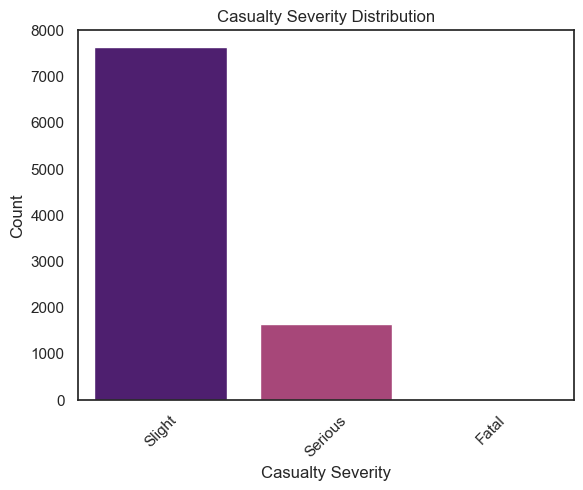

In [32]:
# Define plot object for 'casualty_severity'
sns.set_style('white')
count = sns.countplot(data = trainset, x = 'casualty_severity',  palette='magma')

# Setting graph title and labels
count.set_title('Casualty Severity Distribution')
count.set(xlabel='Casualty Severity', ylabel='Count')

# Slant the x-axis labels by setting a rotation
plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better visibility

plt.ylim(0,8000)

# Showing the plot
plt.show()



#### 3.2 Dependent Variables

##### 3.2.1 Numerical Variables

###### 3.2.1.1 Engine Capacity cc


In [33]:
# Generate summary statistics for the 'engine_capacity_cc' variable
# Convert the output into a DataFrame for better readability
pd.DataFrame(trainset.loc[:,'engine_capacity_cc'].describe())

,engine_capacity_cc
count,9257
unique,264
top,Data missing or out of range
freq,2250


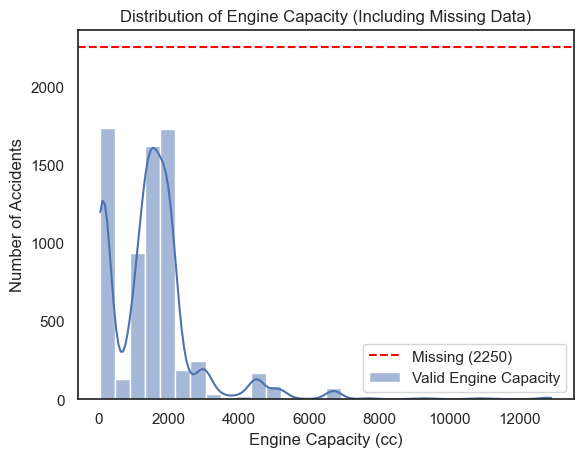

In [34]:
sns.set_style("white")  # Removes background gridlines
# Separate numeric values and "Data missing or out of range"
trainset['engine_capacity_cc'] = trainset['engine_capacity_cc'].astype(str)  # Ensures everything is treated as a string
missing_count = trainset['engine_capacity_cc'].value_counts().get("Data missing or out of range", 0)

# Plot numeric values only
numeric_data = trainset[trainset['engine_capacity_cc'] != "Data missing or out of range"]['engine_capacity_cc'].astype(float)
sns.histplot(numeric_data, bins=30, kde=True, label="Valid Engine Capacity")

# Add missing data count as a separate bar
plt.axhline(y=missing_count, color='red', linestyle='dashed', label=f'Missing ({missing_count})')

# Labels and title
plt.xlabel("Engine Capacity (cc)")
plt.ylabel("Number of Accidents")
plt.title("Distribution of Engine Capacity (Including Missing Data)")
plt.legend()
plt.show()

* The distribution shows that most vehicles have engine capacities below 3000cc, with very few above 6000cc, possibly high-performance or commercial vehicles. A significant portion (2,250 cases) is missing or out of range, shown by the red dashed line. This missing data may skew analysis, requiring imputation or exclusion for accuracy.

In [35]:
#Check the descriptive stats on the numeric dataset
numeric_data.describe()

count     7007.000000
mean      1530.375482
std       1346.919051
min         49.000000
25%        600.000000
50%       1498.000000
75%       1984.000000
max      12902.000000
Name: engine_capacity_cc, dtype: float64

###### 3.2.1.2 Age of Vehicle


In [36]:
pd.DataFrame(trainset.loc[:,'age_of_vehicle'].describe())

,age_of_vehicle
count,9257.000000
mean,5.655504
std,5.795719
min,-1.000000
25%,1.000000
50%,5.000000
75%,9.000000
max,36.000000


The average vehicle age is 5.66 years, with most between 1 and 9 years. The minimum value of -1 suggests data entry errors that need cleaning. The oldest vehicle is 36 years, however the mean suggests a relatively young vehicle fleet and the high standard deviation (5.8) indicates a wide range of vehicle ages.

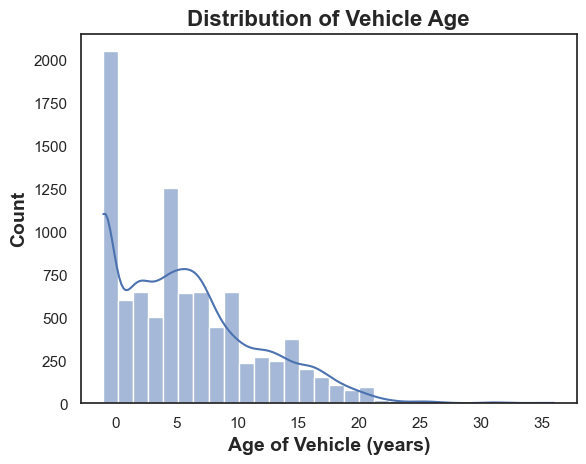

In [37]:
# Set Seaborn style to a clean white background
sns.set_style("white")

# Create a histogram for the 'age_of_vehicle' column
# - Use 30 bins for better granularity
# - Includes a Kernel Density Estimate (KDE) to show the distribution curve
# - Sets the color to "skyblue" for better visibility
sns.histplot(trainset['age_of_vehicle'], bins=30, kde=True, )

# Set x-axis label with a descriptive title
plt.xlabel("Age of Vehicle (years)", fontsize=14, fontweight='bold')

# Set y-axis label to indicate count
plt.ylabel("Count", fontsize=14, fontweight='bold')

# Set the title of the plot
plt.title("Distribution of Vehicle Age", fontsize=16, fontweight='bold')

# Display the plot
plt.show()

* The vehicle age distribution is right-skewed, with most vehicles between 0-10 years old, peaking around newer vehicles (0-2 years). There are fewer older vehicles, but some exceed 30 years, possibly indicating classic or poorly maintained vehicles. The high frequency of very new cars suggests recent purchases or fleet vehicles.

##### 3.2.2 Categorical variables

###### 3.2.2.1 Vehicle Manoeuvre

In [38]:
# Getting the value counts of the 'vehicle_manoeuvre' variable
# This counts the occurrences of each unique value in the 'vehicle_manoeuvre' column
values = pd.DataFrame(trainset['vehicle_manoeuvre'].value_counts())
values.columns = ['Vehicle Manoeuvre Count']  # Renaming the column for clarity

# The normalize attribute in the value_counts method computes the percentage for each category
# This calculates the relative frequency (percentage) of each unique value in the column
percentages = pd.DataFrame(round(trainset['vehicle_manoeuvre'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['% Vehicle Manoeuvre']  # Renaming the column for clarity

# Converting the percentage values to a string format with a '%' sign for better readability
percentages['% Vehicle Manoeuvre'] = percentages['% Vehicle Manoeuvre'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes to create a summary table
# This combines the count and percentage information into a single table for easier analysis
summary_table = values.join(percentages)

# Displaying the summary table
summary_table

,Vehicle Manoeuvre Count,% Vehicle Manoeuvre
unknown (self reported),3924,42.39%
Going ahead other,2360,25.49%
Turning right,739,7.98%
Moving off,500,5.4%
Slowing or stopping,347,3.75%
Turning left,311,3.36%
Waiting to go - held up,236,2.55%
Going ahead right-hand bend,111,1.2%
Overtaking moving vehicle - offside,102,1.1%
Going ahead left-hand bend,99,1.07%


* The most common manoeuvre is "unknown (self reported)" (41.9%), indicating a large portion of data lacks specific manoeuvre details.

* Rare manoeuvres like "Changing lane to right" (0.23%) highlight potential class imbalance in the dataset.

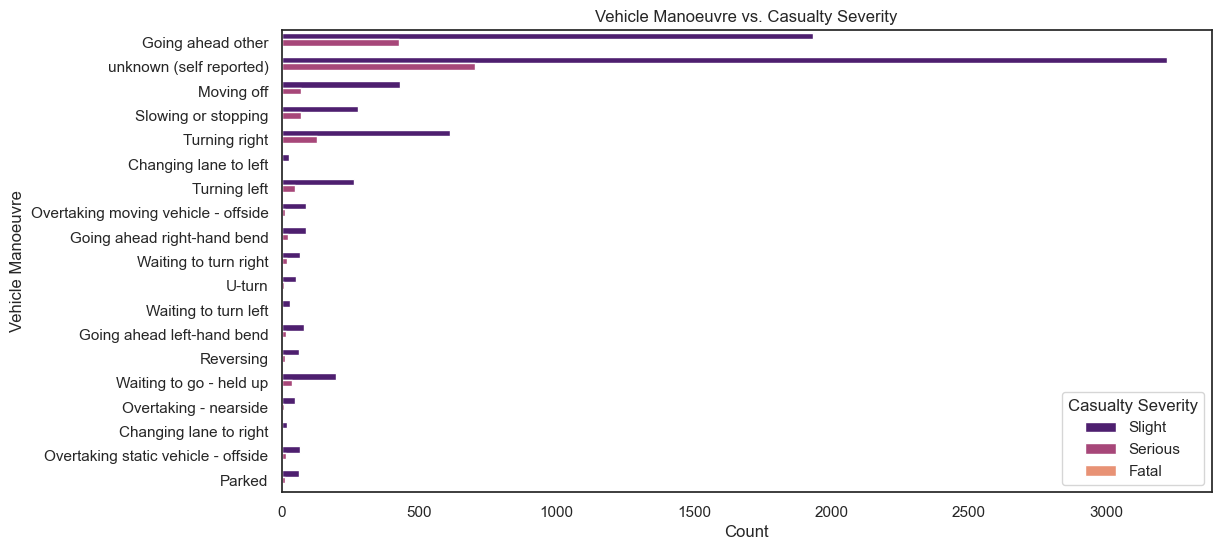

In [39]:
# Creating a count plot to visualize the relationship between 'vehicle_manoeuvre' and 'casualty_severity'
# The plot uses a horizontal orientation (y-axis) for better readability of manoeuvre categories
plt.figure(figsize=(12, 6))  # Setting the figure size for better visualization
sns.countplot(y=trainset['vehicle_manoeuvre'], hue=trainset['casualty_severity'], palette='magma')
plt.title('Vehicle Manoeuvre vs. Casualty Severity')  # Adding a title to the plot
plt.xlabel('Count')  # Labeling the x-axis
plt.ylabel('Vehicle Manoeuvre')  # Labeling the y-axis
plt.legend(title="Casualty Severity")  # Adding a legend to distinguish severity levels
plt.show()  # Displaying the plot

* "Unknown (self reported)" and "Going ahead other" have the highest incident counts, with most casualties being Slight.

* Fatal incidents are relatively rare but appear more frequently in manoeuvres like "Turning right" and "Moving off", indicating potential risk factors.

###### 3.2.2.2 Junction Location

In [40]:
# Getting the value counts of the 'junction_location' variable
# This counts the occurrences of each unique value in the 'junction_location' column
values = pd.DataFrame(trainset['junction_location'].value_counts())
values.columns = ['Junction Location Count']  # Renaming the column for clarity

# The normalize attribute in the value_counts method computes the percentage for each category
# This calculates the relative frequency (percentage) of each unique value in the column
percentages = pd.DataFrame(round(trainset['junction_location'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['% Junction Location']  # Renaming the column for clarity

# Converting the percentage values to a string format with a '%' sign for better readability
percentages['% Junction Location'] = percentages['% Junction Location'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes to create a summary table
# This combines the count and percentage information into a single table for easier analysis
summary_table = values.join(percentages)

# Displaying the summary table
summary_table

,Junction Location Count,% Junction Location
unknown (self reported),3300,35.65%
Approaching junction or waiting/parked at junction approach,1808,19.53%
Not at or within 20 metres of junction,1779,19.22%
Mid Junction - on roundabout or on main road,844,9.12%
Cleared junction or waiting/parked at junction exit,622,6.72%
Entering main road,303,3.27%
Leaving main road,277,2.99%
Entering roundabout,151,1.63%
Leaving roundabout,133,1.44%
Entering from slip road,40,0.43%


* "Unknown (self reported)" is the most common category (35.1%), indicating a significant portion of data lacks specific junction location details.

* Incidents are also frequent "Approaching junction" (19.79%) and "Not at or within 20 metres of junction" (19.28%), suggesting these areas may require further safety analysis.

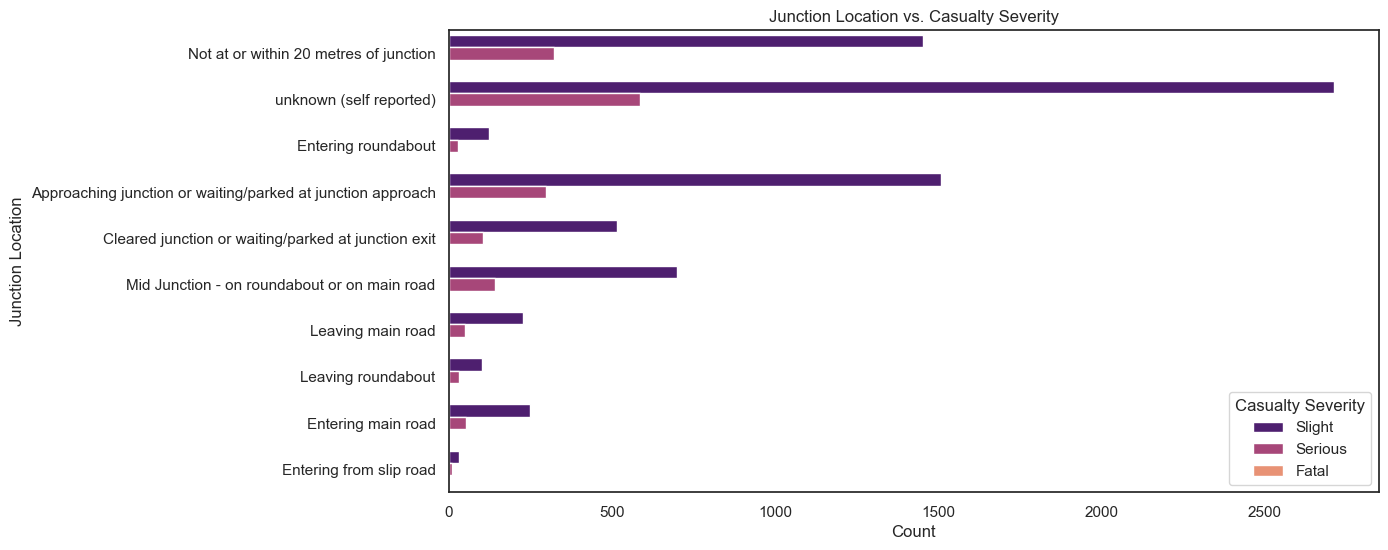

In [41]:
# Creating a count plot to visualize the relationship between 'junction_location' and 'casualty_severity'
# The plot uses a horizontal orientation (y-axis) for better readability of junction location categories
plt.figure(figsize=(12, 6))  # Setting the figure size for better visualization
sns.countplot(y=trainset['junction_location'], hue=trainset['casualty_severity'], palette='magma')
plt.title('Junction Location vs. Casualty Severity')  # Adding a title to the plot
plt.xlabel('Count')  # Labeling the x-axis
plt.ylabel('Junction Location')  # Labeling the y-axis
plt.legend(title="Casualty Severity")  # Adding a legend to distinguish severity levels
plt.show()  # Displaying the plot

* "Unknown (self reported)" has the highest incident counts, with most casualties being Slight, indicating a lack of detailed location data for many incidents.

###### 3.2.2.3 Skidding and Overturning

In [42]:
# Getting the value counts of the 'skidding_and_overturning' variable
# This counts the occurrences of each unique value in the 'skidding_and_overturning' column
values = pd.DataFrame(trainset['skidding_and_overturning'].value_counts())
values.columns = ['Skidding and Overturning Count']  # Renaming the column for clarity

# The normalize attribute in the value_counts method computes the percentage for each category
# This calculates the relative frequency (percentage) of each unique value in the column
percentages = pd.DataFrame(round(trainset['skidding_and_overturning'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['% Skidding and Overturning']  # Renaming the column for clarity

# Converting the percentage values to a string format with a '%' sign for better readability
percentages['% Skidding and Overturning'] = percentages['% Skidding and Overturning'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes to create a summary table
# This combines the count and percentage information into a single table for easier analysis
summary_table = values.join(percentages)

# Displaying the summary table
summary_table

,Skidding and Overturning Count,% Skidding and Overturning
None,4861,52.51%
unknown (self reported),3944,42.61%
Skidded,238,2.57%
Overturned,127,1.37%
Skidded and overturned,85,0.92%
Jackknifed,2,0.02%


* "None" is the most common category (52.95%), indicating that most incidents did not involve skidding or overturning.

* A significant portion of data is labeled as "unknown (self reported)" (42.11%), highlighting potential gaps in reporting or data collection.

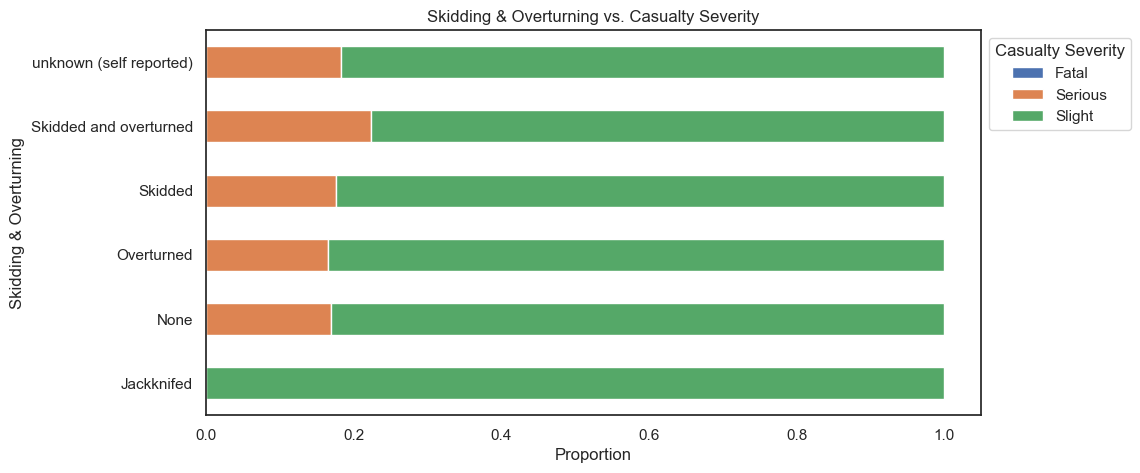

In [43]:
# Creating a cross-tabulation (contingency table) to analyze the relationship between 
# 'skidding_and_overturning' and 'casualty_severity'
# The normalize='index' parameter computes proportions row-wise (i.e., for each skidding/overturning category)
cross_tab = pd.crosstab(trainset['skidding_and_overturning'], trainset['casualty_severity'], normalize='index')

# Plotting the cross-tabulation as a stacked horizontal bar chart
cross_tab.plot(kind='barh', stacked=True, figsize=(10, 5))
plt.title('Skidding & Overturning vs. Casualty Severity')  # Adding a title to the plot
plt.xlabel('Proportion')  # Labeling the x-axis (proportions)
plt.ylabel('Skidding & Overturning')  # Labeling the y-axis (skidding/overturning categories)
plt.legend(title="Casualty Severity", bbox_to_anchor=(1, 1))  # Adding a legend for casualty severity
plt.show()  # Displaying the plot

* "Skidded and overturned" has the highest proportion of Serious and Fatal incidents, making it the most severe scenario.

* "None" (no skidding or overturning) has the highest proportion of Slight incidents, indicating less severe outcomes in such cases.

###### 3.2.2.4 Vehicle Leaving Carriageway

In [44]:
# Getting the value counts of the 'vehicle_leaving_carriageway' variable
# This counts the occurrences of each unique value in the 'vehicle_leaving_carriageway' column
values = pd.DataFrame(trainset['vehicle_leaving_carriageway'].value_counts())
values.columns = ['Vehicle Leaving Carriageway Count']  # Renaming the column for clarity

# The normalize attribute in the value_counts method computes the percentage for each category
# This calculates the relative frequency (percentage) of each unique value in the column
percentages = pd.DataFrame(round(trainset['vehicle_leaving_carriageway'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['% Vehicle Leaving Carriageway']  # Renaming the column for clarity

# Converting the percentage values to a string format with a '%' sign for better readability
percentages['% Vehicle Leaving Carriageway'] = percentages['% Vehicle Leaving Carriageway'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes to create a summary table
# This combines the count and percentage information into a single table for easier analysis
summary_table = values.join(percentages)

# Displaying the summary table
summary_table

,Vehicle Leaving Carriageway Count,% Vehicle Leaving Carriageway
Did not leave carriageway,4924,53.19%
unknown (self reported),3901,42.14%
Nearside,251,2.71%
Offside,99,1.07%
Straight ahead at junction,39,0.42%
Offside on to central reservation,21,0.23%
Nearside and rebounded,12,0.13%
Offside and rebounded,8,0.09%
Offside on to centrl res + rebounded,2,0.02%


* "Did not leave carriageway" is the most common category (53.63%), indicating that in most incidents, vehicles remained on the carriageway.

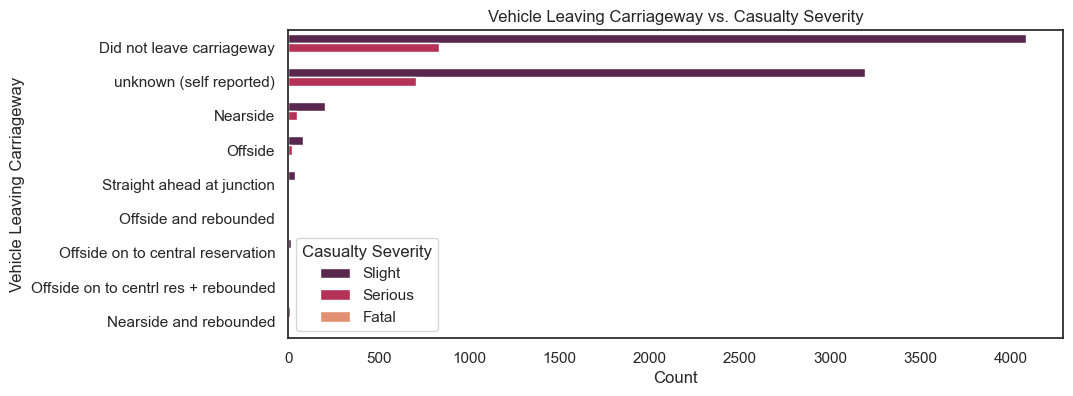

In [45]:
# Creating a count plot to visualize the relationship between 'vehicle_leaving_carriageway' and 'casualty_severity'
# The plot uses a horizontal orientation (y-axis) for better readability of vehicle leaving carriageway categories
plt.figure(figsize=(10, 4))  # Setting the figure size for better visualization
sns.countplot(y=trainset['vehicle_leaving_carriageway'], hue=trainset['casualty_severity'], palette='rocket')
plt.title('Vehicle Leaving Carriageway vs. Casualty Severity')  # Adding a title to the plot
plt.xlabel('Count')  # Labeling the x-axis
plt.ylabel('Vehicle Leaving Carriageway')  # Labeling the y-axis
plt.legend(title="Casualty Severity")  # Adding a legend to distinguish severity levels
plt.show()  # Displaying the plot

* "Did not leave carriageway" has the highest incident counts, with most casualties being Slight, indicating less severe outcomes when vehicles remain on the carriageway.

###### 3.2.2.5 Vehicle Type

In [46]:
# Getting the value counts of the 'vehicle_type' variable
# This counts the occurrences of each unique value in the 'vehicle_type' column
values = pd.DataFrame(trainset['vehicle_type'].value_counts())
values.columns = ['Vehicle Type Count']  # Renaming the column for clarity

# The normalize attribute in the value_counts method computes the percentage for each category
# This calculates the relative frequency (percentage) of each unique value in the column
percentages = pd.DataFrame(round(trainset['vehicle_type'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['% Vehicle Type']  # Renaming the column for clarity

# Converting the percentage values to a string format with a '%' sign for better readability
percentages['% Vehicle Type'] = percentages['% Vehicle Type'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes to create a summary table
# This combines the count and percentage information into a single table for easier analysis
summary_table = values.join(percentages)

# Displaying the summary table
summary_table

,Vehicle Type Count,% Vehicle Type
Car,4914,53.08%
Motorcycle 125cc and under,1569,16.95%
Pedal cycle,1036,11.19%
Van / Goods 3.5 tonnes mgw or under,473,5.11%
Bus or coach (17 or more pass seats),375,4.05%
Taxi/Private hire car,292,3.15%
Motorcycle over 500cc,158,1.71%
Motorcycle over 125cc and up to 500cc,153,1.65%
Other vehicle,67,0.72%
Motorcycle 50cc and under,67,0.72%


* Cars are the most common vehicle type involved in incidents (53.04%), followed by Motorcycles 125cc and under (16.98%).

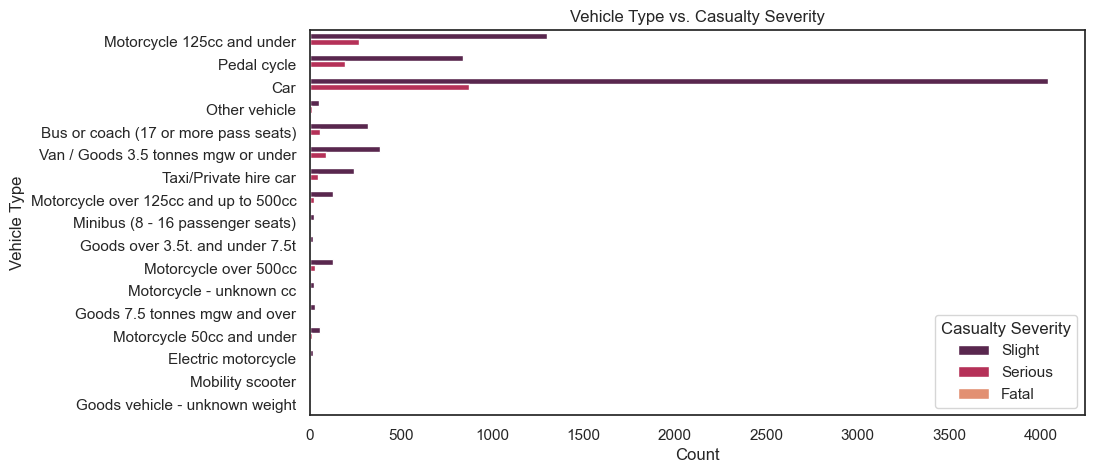

In [47]:
# Creating a count plot to visualize the relationship between 'vehicle_type' and 'casualty_severity'
# The plot uses a horizontal orientation (y-axis) for better readability of vehicle type categories
plt.figure(figsize=(10, 5))  # Setting the figure size for better visualization
sns.countplot(y=trainset['vehicle_type'], hue=trainset['casualty_severity'], palette='rocket')
plt.title('Vehicle Type vs. Casualty Severity')  # Adding a title to the plot
plt.xlabel('Count')  # Labeling the x-axis
plt.ylabel('Vehicle Type')  # Labeling the y-axis
plt.legend(title="Casualty Severity")  # Adding a legend to distinguish severity levels
plt.show()  # Displaying the plot

* Cars have the highest incident counts, with most casualties being Slight, indicating less severe outcomes for car-related incidents.

###### 3.2.2.6 Towing and Articulation

In [48]:
# Getting the value counts of the 'towing_and_articulation' variable
# This counts the occurrences of each unique value in the 'towing_and_articulation' column
values = pd.DataFrame(trainset['towing_and_articulation'].value_counts())
values.columns = ['Towing and Articulation Count']  # Renaming the column for clarity

# The normalize attribute in the value_counts method computes the percentage for each category
# This calculates the relative frequency (percentage) of each unique value in the column
percentages = pd.DataFrame(round(trainset['towing_and_articulation'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['% Towing and Articulation']  # Renaming the column for clarity

# Converting the percentage values to a string format with a '%' sign for better readability
percentages['% Towing and Articulation'] = percentages['% Towing and Articulation'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes to create a summary table
# This combines the count and percentage information into a single table for easier analysis
summary_table = values.join(percentages)

# Displaying the summary table
summary_table

,Towing and Articulation Count,% Towing and Articulation
No tow/articulation,8094,87.44%
unknown (self reported),1079,11.66%
Single trailer,33,0.36%
Caravan,21,0.23%
Other tow,19,0.21%
Articulated vehicle,11,0.12%


* "No tow/articulation" is the most common category (87.92%), indicating that most vehicles involved in incidents were not towing or articulated.

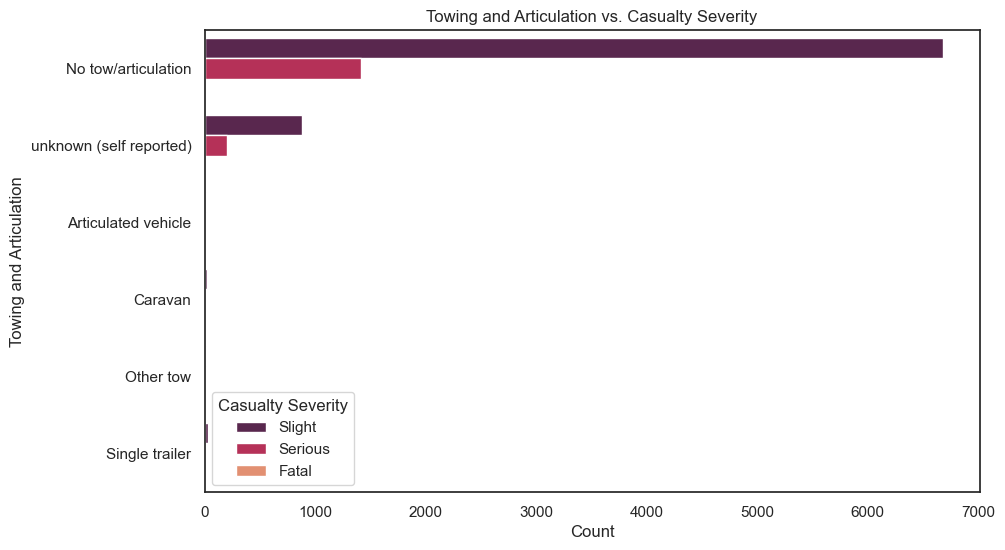

In [49]:
# Creating a count plot to visualize the relationship between 'towing_and_articulation' and 'casualty_severity'
# The plot uses a horizontal orientation (y-axis) for better readability of towing and articulation categories
plt.figure(figsize=(10, 6))  # Setting the figure size for better visualization
sns.countplot(y=trainset['towing_and_articulation'], hue=trainset['casualty_severity'], palette='rocket')
plt.title('Towing and Articulation vs. Casualty Severity')  # Adding a title to the plot
plt.xlabel('Count')  # Labeling the x-axis
plt.ylabel('Towing and Articulation')  # Labeling the y-axis
plt.legend(title="Casualty Severity")  # Adding a legend to distinguish severity levels
plt.show()  # Displaying the plot

* "No tow/articulation" has the highest incident counts, with most casualties being Slight, indicating less severe outcomes for vehicles not towing or articulated.

###### 3.2.2.7 Vehicle Location Restricted

In [50]:
# Getting the value counts of the 'vehicle_location_restricted_lane' variable
# This counts the occurrences of each unique value in the 'vehicle_location_restricted_lane' column
values = pd.DataFrame(trainset['vehicle_location_restricted_lane'].value_counts())
values.columns = ['Vehicle Location Restricted Lane Count']  # Renaming the column for clarity

# The normalize attribute in the value_counts method computes the percentage for each category
# This calculates the relative frequency (percentage) of each unique value in the column
percentages = pd.DataFrame(round(trainset['vehicle_location_restricted_lane'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['% Vehicle Location Restricted Lane']  # Renaming the column for clarity

# Converting the percentage values to a string format with a '%' sign for better readability
percentages['% Vehicle Location Restricted Lane'] = percentages['% Vehicle Location Restricted Lane'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes to create a summary table
# This combines the count and percentage information into a single table for easier analysis
summary_table = values.join(percentages)

# Displaying the summary table
summary_table

,Vehicle Location Restricted Lane Count,% Vehicle Location Restricted Lane
On main c'way - not in restricted lane,4978,53.78%
unknown (self reported),3834,41.42%
Footway (pavement),158,1.71%
Bus lane,112,1.21%
Cycle lane (on main carriageway),43,0.46%
Cycleway or shared use footway (not part of main carriageway),41,0.44%
Tram/Light rail track,39,0.42%
Busway (including guided busway),23,0.25%
On lay-by or hard shoulder,14,0.15%
Entering lay-by or hard shoulder,8,0.09%


* "On main carriageway - not in restricted lane" is the most common category (54.22%), indicating that most incidents occur on the main carriageway outside restricted lanes.

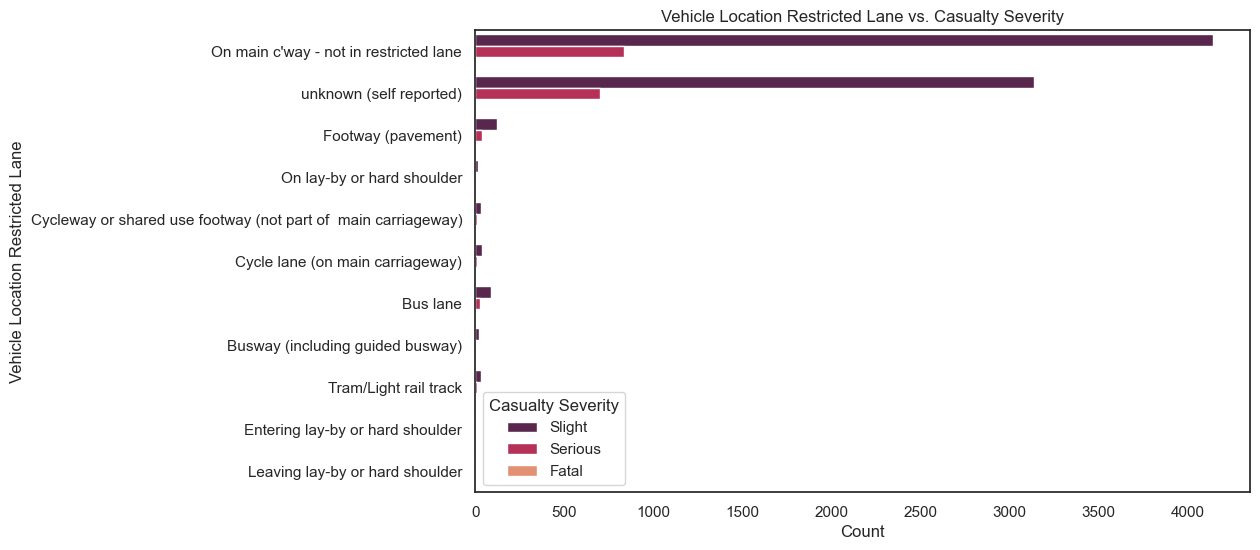

In [51]:
# Creating a count plot to visualize the relationship between 'vehicle_location_restricted_lane' and 'casualty_severity'
# The plot uses a horizontal orientation (y-axis) for better readability of vehicle location categories
plt.figure(figsize=(10, 6))  # Setting the figure size for better visualization
sns.countplot(y=trainset['vehicle_location_restricted_lane'], hue=trainset['casualty_severity'], palette='rocket')
plt.title('Vehicle Location Restricted Lane vs. Casualty Severity')  # Adding a title to the plot
plt.xlabel('Count')  # Labeling the x-axis
plt.ylabel('Vehicle Location Restricted Lane')  # Labeling the y-axis
plt.legend(title="Casualty Severity")  # Adding a legend to distinguish severity levels
plt.show()  # Displaying the plot

* "On main carriageway - not in restricted lane" has the highest incident counts, with most casualties being Slight, indicating less severe outcomes for incidents on the main carriageway.

###### 3.2.2.8 Hit Object in Carriageway

In [52]:
# Getting the value counts of the 'hit_object_in_carriageway' variable
# This counts the occurrences of each unique value in the 'hit_object_in_carriageway' column
values = pd.DataFrame(trainset['hit_object_in_carriageway'].value_counts())
values.columns = ['Hit Object in Carriageway Count']  # Renaming the column for clarity

# The normalize attribute in the value_counts method computes the percentage for each category
# This calculates the relative frequency (percentage) of each unique value in the column
percentages = pd.DataFrame(round(trainset['hit_object_in_carriageway'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['% Hit Object in Carriageway']  # Renaming the column for clarity

# Converting the percentage values to a string format with a '%' sign for better readability
percentages['% Hit Object in Carriageway'] = percentages['% Hit Object in Carriageway'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes to create a summary table
# This combines the count and percentage information into a single table for easier analysis
summary_table = values.join(percentages)

# Displaying the summary table
summary_table

,Hit Object in Carriageway Count,% Hit Object in Carriageway
None,4835,52.23%
unknown (self reported),3905,42.18%
Kerb,182,1.97%
Parked vehicle,158,1.71%
Bollard or refuge,80,0.86%
Other object,62,0.67%
Open door of vehicle,18,0.19%
Any animal (except ridden horse),10,0.11%
Previous accident,4,0.04%
Bridge (side),3,0.03%


* "None" is the most common category (52.59%), indicating that in most incidents, no object was hit in the carriageway.

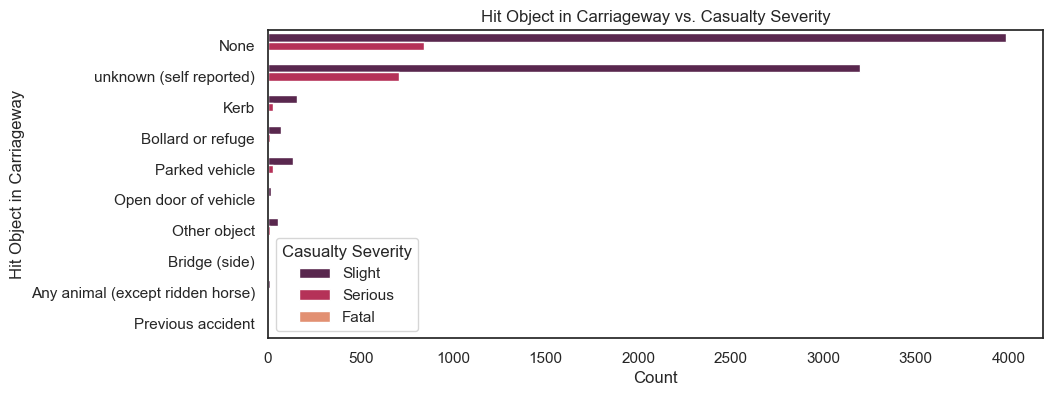

In [53]:
# Creating a count plot to visualize the relationship between 'hit_object_in_carriageway' and 'casualty_severity'
# The plot uses a horizontal orientation (y-axis) for better readability of the hit object categories
plt.figure(figsize=(10, 4))  # Setting the figure size for better visualization
sns.countplot(y=trainset['hit_object_in_carriageway'], hue=trainset['casualty_severity'], palette='rocket')  
plt.title('Hit Object in Carriageway vs. Casualty Severity')  # Adding a title to the plot
plt.xlabel('Count')  # Labeling the x-axis
plt.ylabel('Hit Object in Carriageway')  # Labeling the y-axis
plt.legend(title="Casualty Severity")  # Adding a legend to distinguish severity levels
plt.show()  # Displaying the plot

* "Unknown (self reported)" has the highest incident counts, with most casualties being Slight, indicating a lack of detailed information for many incidents.

###### 3.2.2.9 First point of impact

In [54]:
pd.DataFrame(trainset.loc[:,'first_point_of_impact'].describe())

,first_point_of_impact
count,9257
unique,6
top,Front
freq,4318


The variable is categorised into six types, with "Front" being the most common. This suggests that frontal collisions are the most frequent, likely due to head-on crashes, rear-end collisions, or sudden braking scenarios. Understanding impact types can help improve vehicle safety measures and accident prevention strategies.

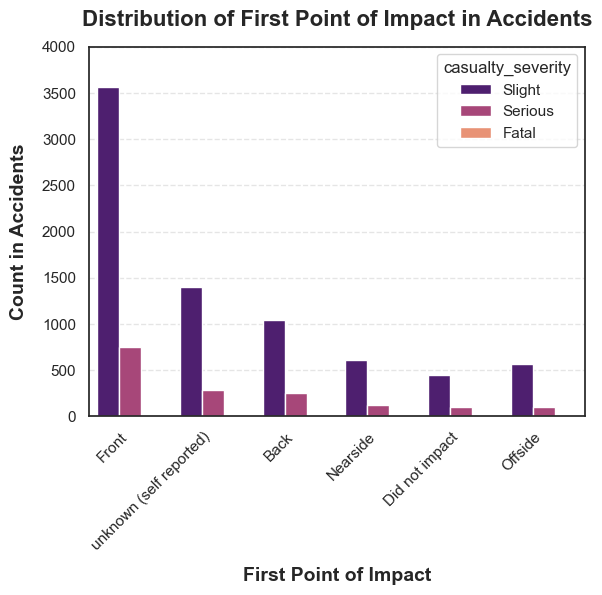

In [55]:
# Set Seaborn style
sns.set_style("white")

# Define plot object with improved style
count_plot = sns.countplot(x='first_point_of_impact', data=trainset, palette="magma", hue = 'casualty_severity')

# Set title and labels with better formatting
count_plot.set_title('Distribution of First Point of Impact in Accidents', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('First Point of Impact', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Count in Accidents', fontsize=14, fontweight='bold', labelpad=10)


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add horizontal gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.ylim(0, 4000)
plt.show()

The front of the vehicle is the most common first point of impact in accidents, suggesting frequent head-on or rear-end collisions. Self-reported unknown impacts are the second highest, indicating potential data uncertainty. Rear, nearside, offside, and non-impact cases occur less frequently.

###### 3.2.2.10 Vehicle left hand drive

In [56]:
pd.DataFrame(trainset.loc[:,'vehicle_left_hand_drive'].describe())

,vehicle_left_hand_drive
count,9257
unique,3
top,No
freq,7027


Most vehicles are not left-hand drive, indicating that right-hand drive vehicles dominate in this dataset. The presence of left-hand drive vehicles suggests international or imported cars.

In [57]:
# Getting the value counts of the 'vehicle_left_hand_drive' variable
values = pd.DataFrame(trainset['vehicle_left_hand_drive'].value_counts())
values.columns = ['vehicle_left_hand_drive Count']

# The normalize attribute in the value_counts method computes the percentage for each category
percentages = pd.DataFrame(round(trainset['vehicle_left_hand_drive'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['%vehicle_left_hand_drive']

# Converting the percentage values to a string format with a '%' sign
percentages['%vehicle_left_hand_drive'] = percentages['%vehicle_left_hand_drive'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes
values.join(percentages)

,vehicle_left_hand_drive Count,%vehicle_left_hand_drive
No,7027,75.91%
Unknown,2118,22.88%
Yes,112,1.21%


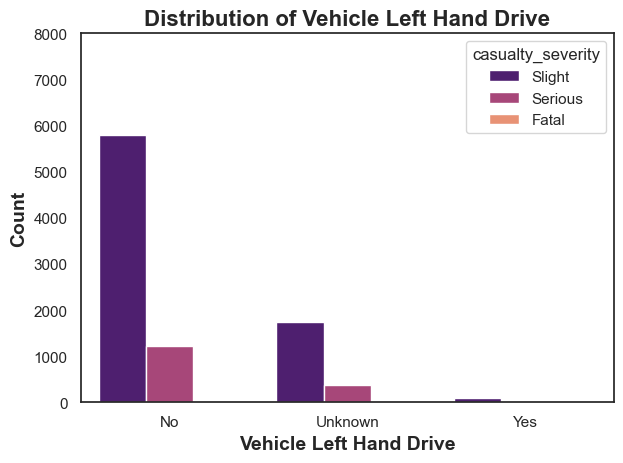

In [58]:
# Bar Chart distribution
sns.set(style="white")

count_plot = sns.countplot(x='vehicle_left_hand_drive', data=trainset, palette="magma", hue = 'casualty_severity')

# Setting the title and labels
count_plot.set_title('Distribution of Vehicle Left Hand Drive', fontsize=16, fontweight='bold')
plt.xlabel('Vehicle Left Hand Drive', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')


# Show the plot
plt.ylim(0, 8000)
plt.tight_layout()
plt.show()

Most vehicles in the dataset are right-hand drive, making up the majority. Only 112 left-hand drive vehicles exist, likely imports or special-use cars.

###### 3.2.2.11 Journey purpose of driver

In [59]:
pd.DataFrame(trainset.loc[:,'journey_purpose_of_driver'].describe())

,journey_purpose_of_driver
count,9257
unique,5
top,Not known
freq,5962


The journey purpose of the driver is mostly unknown, indicating data gaps in accident reporting. Among the five categories, the remaining provide meaningful insights into whether travel purpose affects accident risk.

In [60]:
# Getting the value counts of the 'journey_purpose_of_driver' variable
values = pd.DataFrame(trainset['journey_purpose_of_driver'].value_counts())
values.columns = ['journey_purpose_of_driver Count']

# The normalize attribute in the value_counts method computes the percentage for each category
percentages = pd.DataFrame(round(trainset['journey_purpose_of_driver'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['%journey_purpose_of_driver']

# Converting the percentage values to a string format with a '%' sign
percentages['%journey_purpose_of_driver'] = percentages['%journey_purpose_of_driver'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes
values.join(percentages)

,journey_purpose_of_driver Count,%journey_purpose_of_driver
Not known,5962,64.41%
Journey as part of work,1737,18.76%
Commuting to/from work,1409,15.22%
Taking pupil to/from school,130,1.4%
Pupil riding to/from school,19,0.21%


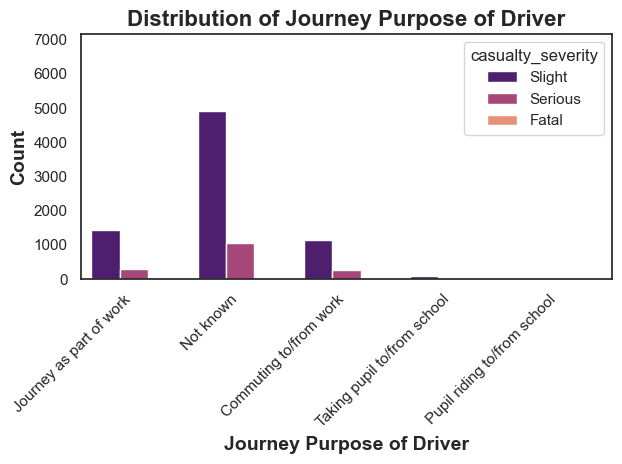

In [61]:
# Countplot for 'journey_purpose_of_driver'
sns.set(style="white")
count_plot = sns.countplot(x='journey_purpose_of_driver', data=trainset, palette="magma",hue = 'casualty_severity')

# Set title and labels
count_plot.set_title('Distribution of Journey Purpose of Driver', fontsize=16, fontweight='bold')
plt.xlabel('Journey Purpose of Driver', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Adjust the y-axis to make sure smaller categories are visible
plt.ylim(0, trainset['journey_purpose_of_driver'].value_counts().max() * 1.2)  # Set y-axis limit to 120% of max count

# Rotate x-axis labels because they are long
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.tight_layout()
plt.show()

The majority of journey purposes are unknown. Among known cases, work-related journeys (part of work or commuting) dominate, suggesting higher accident risk for working drivers. School-related trips are rare, possibly indicating safer travel conditions or underreporting.

###### 3.2.2.12 Sex of driver

In [62]:
pd.DataFrame(trainset.loc[:,'sex_of_driver'].describe())

,sex_of_driver
count,9257
unique,3
top,Male
freq,5913


Most drivers in the dataset are male, suggesting a higher involvement of men in reported accidents.

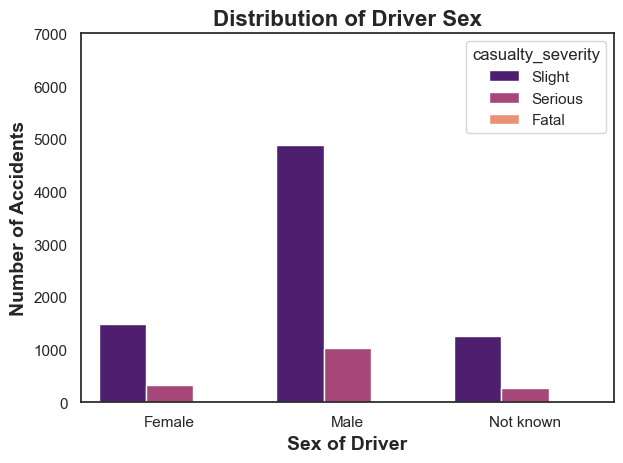

In [63]:
sns.set(style="white")

# Countplot
count_plot = sns.countplot(x='sex_of_driver', data=trainset, palette="magma",hue = 'casualty_severity')

# Set the title and labels with larger font sizes for clarity
count_plot.set_title('Distribution of Driver Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex of Driver', fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold')

# Annotate each bar with the count value and percentage
total = len(trainset)  # Total number of rows in the dataset

for p in count_plot.patches:
    # Get the height of each bar (the count)
    height = p.get_height()
    
    # Calculate the percentage
    percentage = (height / total) * 100
    

# Show the plot
plt.ylim(0, 7000)
plt.tight_layout()
plt.show()

Most drivers in accidents are male (63.9%), significantly higher than female drivers (19.6%). This could indicate higher male driving exposure or riskier driving behavior.

###### 3.2.2.13 Age band of driver


In [64]:
pd.DataFrame(trainset.loc[:,'age_band_of_driver'].describe())

,age_band_of_driver
count,9257
unique,11
top,26 - 35
freq,2383


The 26-35 age group is the most common among drivers in accidents. With 11 unique age bands, accidents involve a diverse age range. Understanding whether younger or older drivers have higher accident severity could improve targeted road safety campaigns and driver training programs.

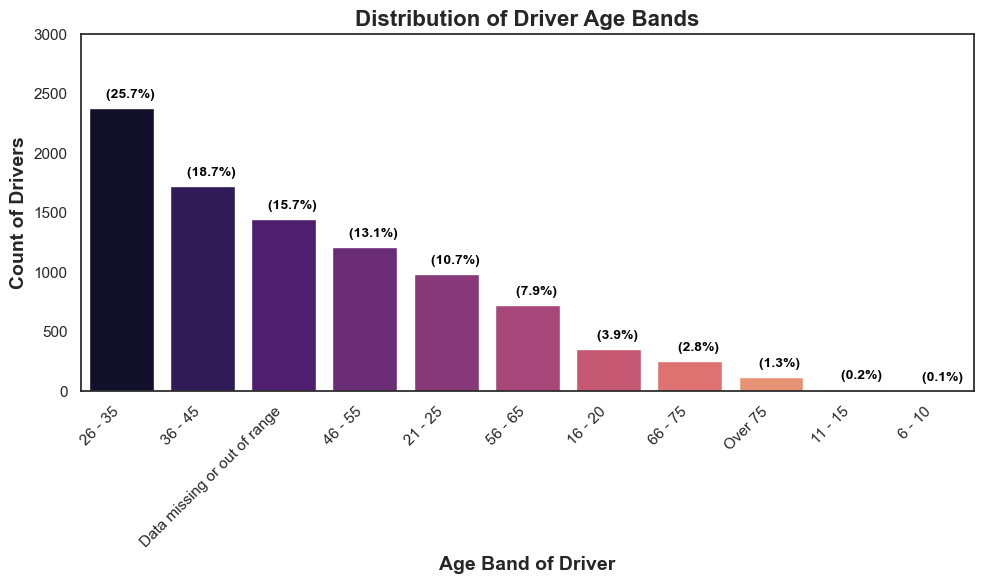

In [65]:
sns.set(style="white")

plt.figure(figsize=(10, 6))  # Adjust figure size to make the plot clearer

# Plot the countplot for 'age_band_of_driver'
count_plot = sns.countplot(x='age_band_of_driver', data=trainset, palette="magma", order=trainset['age_band_of_driver'].value_counts().index)

# Set the title and labels with larger font sizes for better readability
count_plot.set_title('Distribution of Driver Age Bands', fontsize=16, fontweight='bold')
plt.xlabel('Age Band of Driver', fontsize=14, fontweight='bold')
plt.ylabel('Count of Drivers', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees to avoid overlap

# Calculate total number of drivers for percentage calculation
total = len(trainset)

# Annotate the bars with the count and percentage
for p in count_plot.patches:
    # Get the height of each bar (the count of each age band)
    height = p.get_height()
    
    # Calculate the percentage
    percentage = (height / total) * 100
    
    # Annotate with both count and percentage on top of the bars
    count_plot.annotate(f' ({percentage:.1f}%)',
                        (p.get_x() + p.get_width() / 2., height),  # Position the text at the top of the bar
                        ha='center', va='bottom',  # Horizontal center, vertical bottom
                        fontsize=10, fontweight='bold', color='black',
                        xytext=(5, 5), textcoords='offset points')  # Slight vertical offset for better readability

# Show the plot with tight layout to ensure labels and title fit properly
plt.ylim(0, 3000)
plt.tight_layout()
plt.show()

The 26-35 age group accounts for 25.7% of accidents, making them the most involved drivers. Accident frequency decreases with age, suggesting younger drivers may take more risks or have higher exposure.

###### 3.2.2.14 Propulsion code

In [66]:
pd.DataFrame(trainset.loc[:,'propulsion_code'].describe())

,propulsion_code
count,9257
unique,7
top,Petrol
freq,4484


The majority of vehicles use petrol, followed by other propulsion types. With seven unique fuel types, the dataset represents a diverse vehicle mix.

In [67]:
# Getting the value counts of the 'propulsion_code' variable
values = pd.DataFrame(trainset['propulsion_code'].value_counts())
values.columns = ['propulsion_code Count']

# The normalize attribute in the value_counts method computes the percentage for each category
percentages = pd.DataFrame(round(trainset['propulsion_code'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['%propulsion_code']

# Converting the percentage values to a string format with a '%' sign
percentages['%propulsion_code'] = percentages['%propulsion_code'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes
values.join(percentages)

,propulsion_code Count,%propulsion_code
Petrol,4484,48.44%
Undefined,1993,21.53%
Heavy oil,1816,19.62%
Hybrid electric,685,7.4%
Electric,254,2.74%
Electric diesel,21,0.23%
Gas/Bi-fuel,4,0.04%


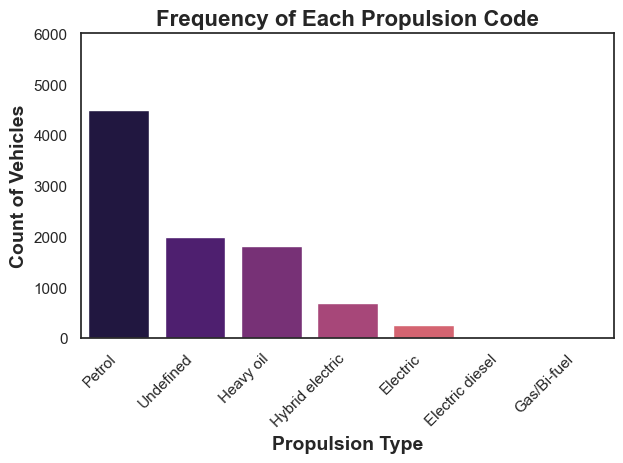

In [68]:
# Bar plot with annotations for frequency
# Set the figure size
sns.set(style="white")
sns.countplot(x='propulsion_code', data=trainset, palette='magma')

# Title and axis labels
plt.title('Frequency of Each Propulsion Code', fontsize=16, fontweight='bold')
plt.xlabel('Propulsion Type', fontsize=14, fontweight='bold')
plt.ylabel('Count of Vehicles', fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.ylim(0, 6000)
plt.tight_layout()
plt.show()

Petrol-powered vehicles dominate, followed by heavy oil. Hybrid electric and electric vehicles are less common, suggesting limited adoption.

###### 3.2.2.15 Generic make model

In [69]:
pd.DataFrame(trainset.loc[:,'generic_make_model'].describe())

,generic_make_model
count,9257
unique,423
top,-1
freq,2185


The dataset contains 423 unique vehicle models, but "-1" appears most frequently, likely indicating missing or unclassified data.

In [70]:
# Getting the value counts of the 'generic_make_model' variable
values = pd.DataFrame(trainset['generic_make_model'].value_counts())
values.columns = ['generic_make_model Count']

# The normalize attribute in the value_counts method computes the percentage for each category
percentages = pd.DataFrame(round(trainset['generic_make_model'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['%generic_make_model']

# Converting the percentage values to a string format with a '%' sign
percentages['%generic_make_model'] = percentages['%generic_make_model'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes
values.join(percentages)

,generic_make_model Count,%generic_make_model
-1,2185,23.6%
YAMAHA GPD,380,4.11%
HONDA WW125,361,3.9%
TOYOTA PRIUS,257,2.78%
HONDA SH 125,210,2.27%
...,...,...
LEXUS GS 450,1,0.01%
SEAT ALTEA,1,0.01%
PIAGGIO FLY,1,0.01%
JEEP GRAND CHEROKEE,1,0.01%


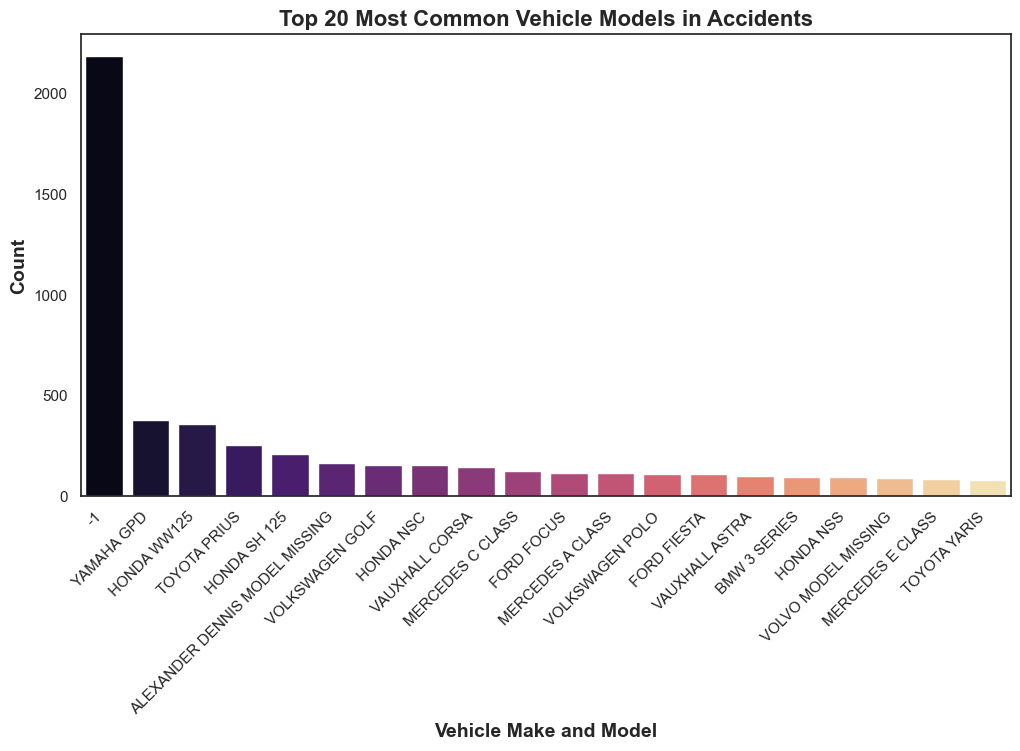

In [71]:
# Set the Seaborn style to a clean white background
sns.set(style="white")

# Create a figure with a specified size
plt.figure(figsize=(12, 6))

# Get the top 20 most common vehicle models in accidents
top_models = trainset['generic_make_model'].value_counts().nlargest(20)

# Create a bar plot with the "magma" color palette
sns.barplot(x=top_models.index, y=top_models.values, palette="magma")

# Set x-axis and y-axis labels
plt.xlabel("Vehicle Make and Model", fontsize=14, fontweight='bold')  
plt.ylabel("Count", fontsize=14, fontweight='bold')  

# Set the plot title with better readability
plt.title("Top 20 Most Common Vehicle Models in Accidents", fontsize=16, fontweight='bold')


# Rotate x-axis labels at 45 degrees for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

The most common entry is "-1", indicating a large amount of missing vehicle model data. Among known models, motorcycles (Yamaha, Honda WW125, Honda SH 125) and popular cars (Toyota Prius, Volkswagen Golf, Ford Focus) dominate. This suggests motorcycles may be overrepresented in accidents.

###### 3.2.2.16 Driver IMD decile

In [72]:
pd.DataFrame(trainset.loc[:,'driver_imd_decile'].describe())

,driver_imd_decile
count,9257
unique,11
top,Data missing or out of range
freq,1677


In [73]:
# Getting the value counts of the 'driver_imd_decile' variable
values = pd.DataFrame(trainset['driver_imd_decile'].value_counts())
values.columns = ['driver_imd_decile Count']

# The normalize attribute in the value_counts method computes the percentage for each category
percentages = pd.DataFrame(round(trainset['driver_imd_decile'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['%driver_imd_decile']

# Converting the percentage values to a string format with a '%' sign
percentages['%driver_imd_decile'] = percentages['%driver_imd_decile'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes
values.join(percentages)

,driver_imd_decile Count,%driver_imd_decile
Data missing or out of range,1677,18.12%
More deprived 10-20%,1500,16.2%
More deprived 20-30%,1453,15.7%
More deprived 30-40%,1050,11.34%
More deprived 40-50%,839,9.06%
Less deprived 40-50%,694,7.5%
Most deprived 10%,545,5.89%
Less deprived 30-40%,473,5.11%
Less deprived 20-30%,460,4.97%
Less deprived 10-20%,329,3.55%


A significant portion of driver IMD decile data is missing. The 11 unique values indicate a wide socio-economic distribution among drivers. Investigating whether deprivation levels correlate with accident severity could provide insights into road safety disparities and targeted interventions for high-risk areas.

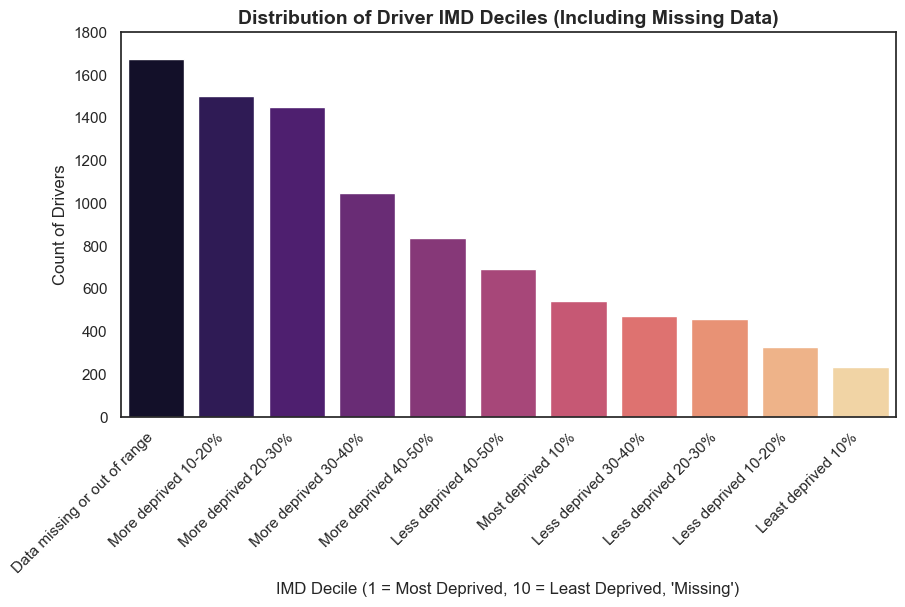

In [74]:
sns.set(style="white") # Seaborn style for a clean background.

plt.figure(figsize=(10, 5)) # Adjust the size

# Create a count plot with ordered categories
count_plot = sns.countplot(
    data=trainset, 
    x='driver_imd_decile', 
    order=trainset['driver_imd_decile'].value_counts().index, 
    palette="magma"
)


# Set labels and title
plt.xlabel("IMD Decile (1 = Most Deprived, 10 = Least Deprived, 'Missing')", fontsize=12)
plt.ylabel("Count of Drivers", fontsize=12)
plt.title("Distribution of Driver IMD Deciles (Including Missing Data)", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.ylim(0,1800)
plt.show()

A large portion of driver IMD decile data is missing, affecting analysis. Most drivers come from more deprived areas (10-50%), while fewer are from less deprived areas (10-50%). This suggests higher accident involvement among drivers from deprived regions, warranting further investigation into socio-economic factors and road safety disparities.

##### 3.2.2.17 Driver Home Area Type

In [75]:
pd.DataFrame(trainset.loc[:,'driver_home_area_type'].describe())

,driver_home_area_type
count,9257
unique,4
top,Urban area
freq,7427


In [76]:
# Getting the value counts of the 'driver_home_area_type' variable
values = pd.DataFrame(trainset['driver_home_area_type'].value_counts())
values.columns = ['driver_home_area_type Count']

# The normalize attribute in the value_counts method computes the percentage for each category
percentages = pd.DataFrame(round(trainset['driver_home_area_type'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['%driver_home_area_type']

# Converting the percentage values to a string format with a '%' sign
percentages['%driver_home_area_type'] = percentages['%driver_home_area_type'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes
values.join(percentages)

,driver_home_area_type Count,%driver_home_area_type
Urban area,7427,80.23%
Data missing or out of range,1657,17.9%
Rural,96,1.04%
Small town,77,0.83%


Majority of the drivers live in urban areas

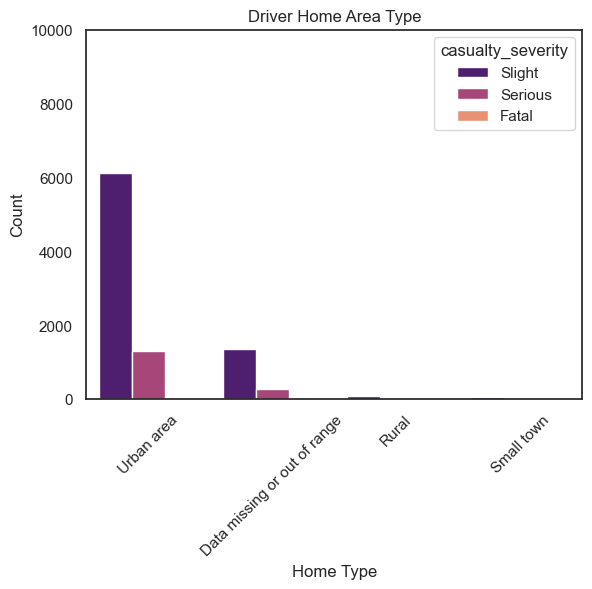

In [77]:
# Define plot object with magma palette
count = sns.countplot(data=trainset, x='driver_home_area_type', hue='casualty_severity', palette='magma')

# Setting graph title and labels
count.set_title('Driver Home Area Type')
count.set(xlabel='Home Type', ylabel='Count')


# Slant the x-axis labels by setting a rotation
plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better visibility

# Show the plot
plt.ylim(0,10000)
plt.show()


##### 3.2.2.18 Sex_of_casualty

In [78]:
pd.DataFrame(trainset.loc[:,'sex_of_casualty'].describe())

,sex_of_casualty
count,9257
unique,3
top,Male
freq,5873


In [79]:
# Getting the value counts of the 'towing_and_articulation' variable
values = pd.DataFrame(trainset['sex_of_casualty'].value_counts())
values.columns = ['sex_of_casualty Count']

# The normalize attribute in the value_counts method computes the percentage for each category
percentages = pd.DataFrame(round(trainset['sex_of_casualty'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['%sex_of_casualty']

# Converting the percentage values to a string format with a '%' sign
percentages['%sex_of_casualty'] = percentages['%sex_of_casualty'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes
values.join(percentages)

,sex_of_casualty Count,%sex_of_casualty
Male,5873,63.44%
Female,3033,32.76%
Data missing or out of range,351,3.79%


Majority of the casualties are male

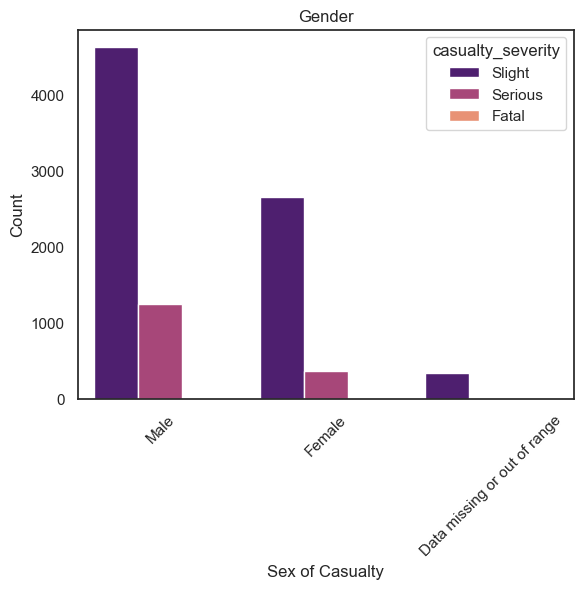

In [80]:
# Define plot object with magma palette
count = sns.countplot(data=trainset, x='sex_of_casualty',hue='casualty_severity', palette='magma')
# Setting graph title and labels
count.set_title('Gender')
count.set(xlabel='Sex of Casualty', ylabel='Count')


# Slant the x-axis labels by setting a rotation
plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better visibility

# Showing the plot **after** adding labels
plt.show()


##### 3.2.2.19 Age_band_of_casualty

In [81]:
pd.DataFrame(trainset.loc[:,'age_band_of_casualty'].describe())

,age_band_of_casualty
count,9257
unique,12
top,26 - 35
freq,2083


In [82]:
# Getting the value counts of the 'age_band_of_casualty' variable
values = pd.DataFrame(trainset['age_band_of_casualty'].value_counts())
values.columns = ['age_band_of_casualty Count']

# The normalize attribute in the value_counts method computes the percentage for each category
percentages = pd.DataFrame(round(trainset['age_band_of_casualty'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['%age_band_of_casualty']

# Converting the percentage values to a string format with a '%' sign
percentages['%age_band_of_casualty'] = percentages['%age_band_of_casualty'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes
values.join(percentages)

,age_band_of_casualty Count,%age_band_of_casualty
26 - 35,2083,22.5%
36 - 45,1949,21.05%
46 - 55,1874,20.24%
21 - 25,914,9.87%
56 - 65,792,8.56%
16 - 20,466,5.03%
6 - 10,365,3.94%
66 - 75,364,3.93%
Over 75,334,3.61%
Data missing or out of range,66,0.71%


The 25-26 age band are most of the casualties

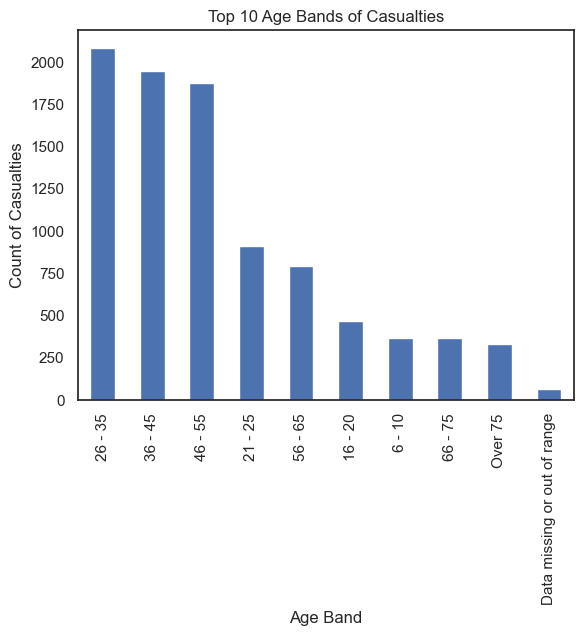

In [83]:
# Create a DataFrame of the top 10 most frequent age bands of casualties
top_age_bands = pd.DataFrame(trainset['age_band_of_casualty'].value_counts()[0:10])

# Plotting the data
# 'kind='bar'' specifies that the plot should be a bar chart
plot = top_age_bands.plot(kind='bar' , legend=False)  # Turn off the legend as it is not necessary here

# Adding title and labels to the plot
plot.set_title('Top 10 Age Bands of Casualties')  # Set the title of the plot
plot.set_xlabel('Age Band')  # Set the x-axis label
plot.set_ylabel('Count of Casualties')  # Set the y-axis label

# Display the plot
plt.show()

##### 3.2.2.20 Pedestrian_location

In [84]:
# Displaying the statistical summary for 'pedestrian_location'
pd.DataFrame(trainset.loc[:, 'pedestrian_location'].describe())

,pedestrian_location
count,9257
unique,8
top,Not a Pedestrian
freq,7205


In [85]:
# Getting the value counts of the 'pedestrian_location' variable
values = pd.DataFrame(trainset['pedestrian_location'].value_counts())
values.columns = ['Pedestrian Location Count']

# The normalize attribute in the value_counts method computes the percentage for each category
percentages = pd.DataFrame(round(trainset['pedestrian_location'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['% Pedestrian Location']

# Converting the percentage values to a string format with a '%' sign
percentages['% Pedestrian Location'] = percentages['% Pedestrian Location'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes
summary_table = values.join(percentages)
summary_table

,Pedestrian Location Count,% Pedestrian Location
Not a Pedestrian,7205,77.83%
Crossing on pedestrian crossing facility,684,7.39%
"In carriageway, crossing elsewhere",352,3.8%
Unknown or other,343,3.71%
On footway or verge,341,3.68%
"In centre of carriageway - not on refuge, island or central reservation",326,3.52%
"In carriageway, not crossing",5,0.05%
"On refuge, central island or central reservation",1,0.01%


'Not a pedestrian' occurred the most as casualties

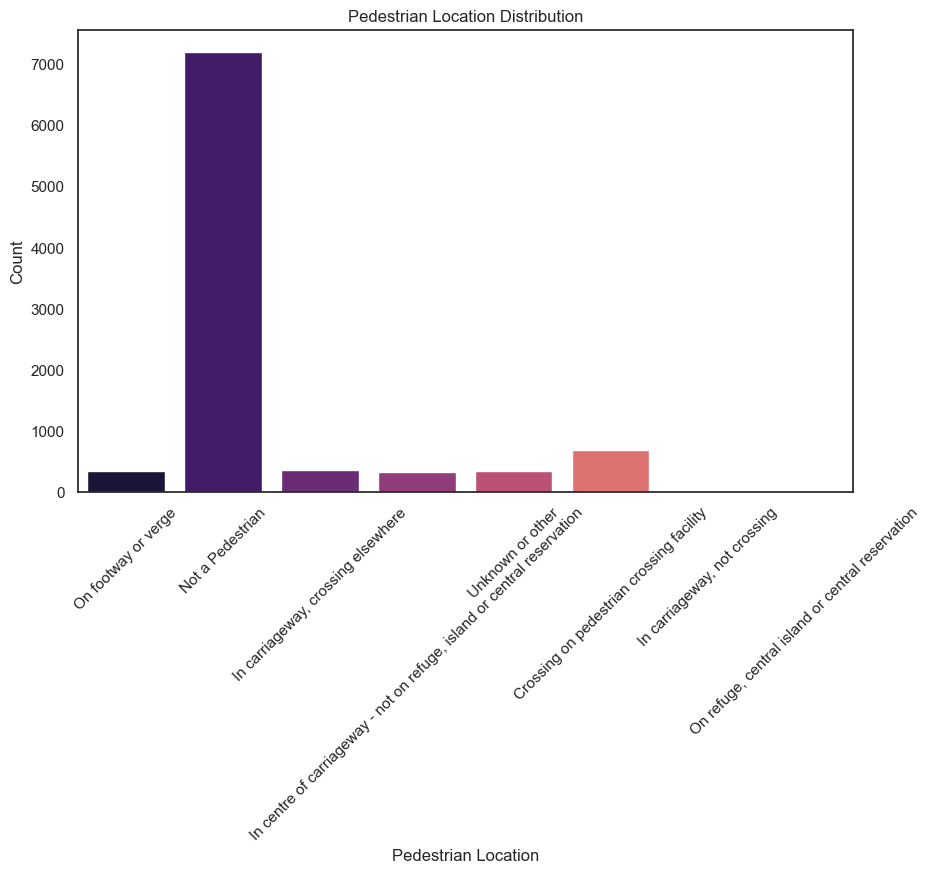

In [86]:
#Pick the fig size
plt.figure(figsize=(10, 6))

# Define plot object for 'pedestrian_location'
count = sns.countplot(data = trainset, x = 'pedestrian_location', palette = 'magma')

# Setting graph title and labels
count.set_title('Pedestrian Location Distribution')
count.set(xlabel='Pedestrian Location', ylabel='Count')


# Slant the x-axis labels by setting a rotation
plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better visibility

# Showing the plot
plt.show()

##### 3.2.2.21 Pedestrian_movement

In [87]:
# Displaying the statistical summary for 'pedestrian_movement'
pd.DataFrame(trainset.loc[:, 'pedestrian_movement'].describe())

,pedestrian_movement
count,9257
unique,5
top,Not a Pedestrian
freq,7205


In [88]:
# Getting the value counts of the 'pedestrian_movement' variable
values = pd.DataFrame(trainset['pedestrian_movement'].value_counts())
values.columns = ['Pedestrian Movement Count']

# The normalize attribute in the value_counts method computes the percentage for each category
percentages = pd.DataFrame(round(trainset['pedestrian_movement'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['% Pedestrian Movement']

# Converting the percentage values to a string format with a '%' sign
percentages['% Pedestrian Movement'] = percentages['% Pedestrian Movement'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes
summary_table = values.join(percentages)
summary_table

,Pedestrian Movement Count,% Pedestrian Movement
Not a Pedestrian,7205,77.83%
Unknown or other,690,7.45%
Crossing from driver's offside,683,7.38%
Crossing from driver's nearside,674,7.28%
"In carriageway, stationary - not crossing (standing or playing)",5,0.05%


Majority of the casualties were drivers and the second cause was not known

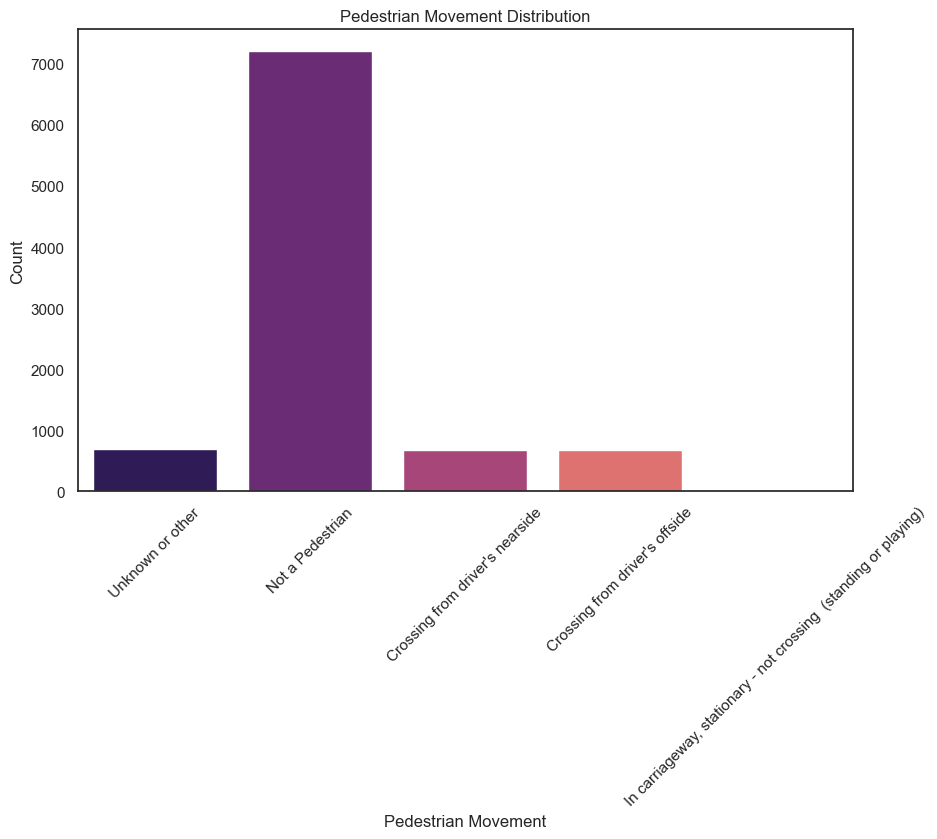

In [89]:
plt.figure(figsize=(10, 6))
# Define plot object for 'pedestrian_movement'
count = sns.countplot(data = trainset, x = 'pedestrian_movement', palette = 'magma')

# Setting graph title and labels
count.set_title('Pedestrian Movement Distribution')
count.set(xlabel='Pedestrian Movement', ylabel='Count')


# Slant the x-axis labels by setting a rotation
plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better visibility

# Showing the plot
plt.show()

##### 3.2.2.22 Car Passenger

In [90]:
# Displaying the statistical summary for 'car_passenger'
pd.DataFrame(trainset.loc[:, 'car_passenger'].describe())

,car_passenger
count,9257
unique,4
top,Not car passenger
freq,8753


In [91]:
# Getting the value counts of the 'car_passenger' variable
values = pd.DataFrame(trainset['car_passenger'].value_counts())
values.columns = ['Car Passenger Count']

# The normalize attribute in the value_counts method computes the percentage for each category
percentages = pd.DataFrame(round(trainset['car_passenger'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['% Car Passenger']

# Converting the percentage values to a string format with a '%' sign
percentages['% Car Passenger'] = percentages['% Car Passenger'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes
summary_table = values.join(percentages)
summary_table

,Car Passenger Count,% Car Passenger
Not car passenger,8753,94.56%
Rear seat passenger,404,4.36%
Front seat passenger,98,1.06%
unknown (self reported),2,0.02%


Most casualties occur when the driver is alone

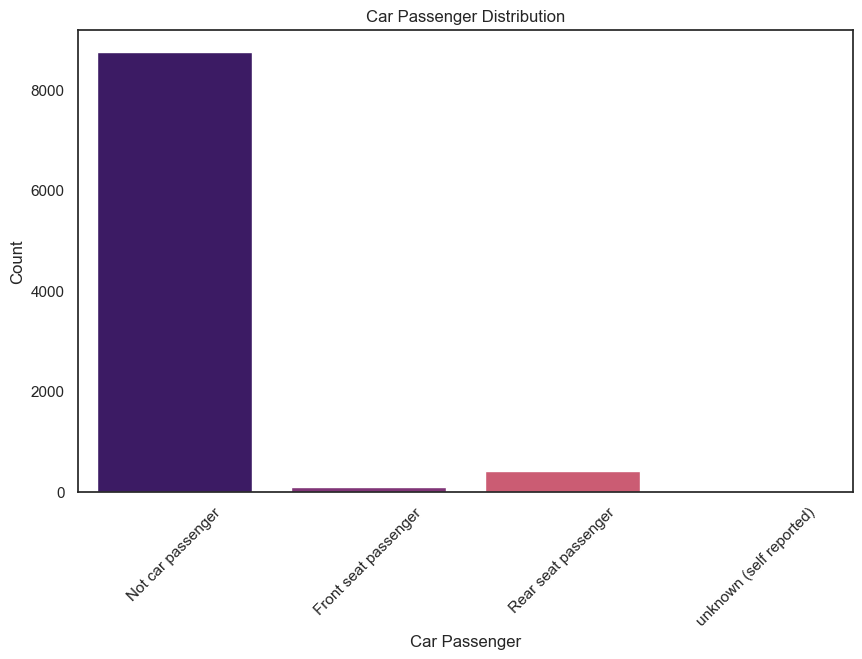

In [92]:
# Define plot object for 'car_passenger'
plt.figure(figsize=(10, 6))
count = sns.countplot(data = trainset ,x = 'car_passenger', palette = 'magma')

# Setting graph title and labels
count.set_title('Car Passenger Distribution')
count.set(xlabel='Car Passenger', ylabel='Count')


# Slant the x-axis labels by setting a rotation
plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better visibility


# Showing the plot
plt.show()

##### 3.2.2.23 Casualty Home Area Type

In [93]:
# Displaying the statistical summary for 'casualty_home_area_type'
pd.DataFrame(trainset.loc[:, 'casualty_home_area_type'].describe())

,casualty_home_area_type
count,9257
unique,4
top,Urban area
freq,8763


In [94]:
# Getting the value counts of the 'casualty_home_area_type' variable
values = pd.DataFrame(trainset['casualty_home_area_type'].value_counts())
values.columns = ['Casualty Home Area Type Count']

# The normalize attribute in the value_counts method computes the percentage for each category
percentages = pd.DataFrame(round(trainset['casualty_home_area_type'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['% Casualty Home Area Type']

# Converting the percentage values to a string format with a '%' sign
percentages['% Casualty Home Area Type'] = percentages['% Casualty Home Area Type'].map(lambda x: str(x) + '%')
# Joining the values and percentages dataframes
summary_table = values.join(percentages)
summary_table

,Casualty Home Area Type Count,% Casualty Home Area Type
Urban area,8763,94.66%
Data missing or out of range,465,5.02%
Rural,15,0.16%
Small town,14,0.15%


Majority of casualties from accidents occur in urban areas

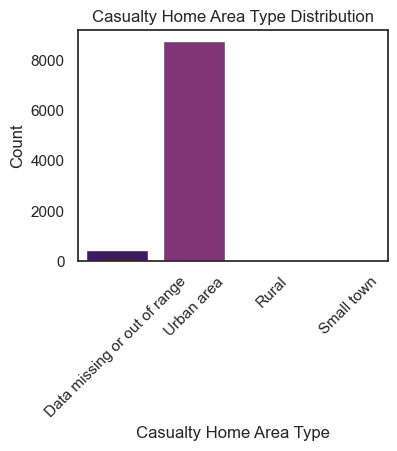

In [95]:
# Define plot object for 'casualty_home_area_type'
plt.figure(figsize=(4, 3))
count = sns.countplot(data = trainset, x ='casualty_home_area_type', palette = 'magma')
# Setting graph title and labels
count.set_title('Casualty Home Area Type Distribution')
count.set(xlabel='Casualty Home Area Type', ylabel='Count')


# Slant the x-axis labels by setting a rotation
plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better visibility

# Showing the plot
plt.show()

##### 3.2.2.24 Casualty Home Area Type

In [96]:
pd.DataFrame(trainset.loc[:,'casualty_class'].describe())

,casualty_class
count,9257
unique,3
top,Driver or rider
freq,6333


In [97]:
# Getting the value counts of the 'casualty_class' variable
values = pd.DataFrame(trainset['casualty_class'].value_counts())
values.columns = ['casualty_class Count']

# The normalize attribute in the value_counts method computes the percentage for each category
percentages = pd.DataFrame(round(trainset['casualty_class'].value_counts(normalize=True) * 100, 2))
percentages.columns = ['%casualty_class']

# Converting the percentage values to a string format with a '%' sign
percentages['%casualty_class'] = percentages['%casualty_class'].map(lambda x: str(x) + '%')

# Joining the values and percentages dataframes
values.join(percentages)

,casualty_class Count,%casualty_class
Driver or rider,6333,68.41%
Pedestrian,2052,22.17%
Passenger,872,9.42%


The main casualties were either driver or riders

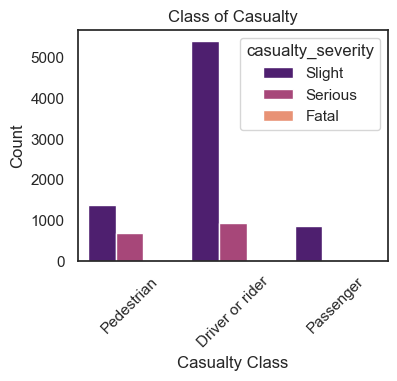

In [98]:
# Define plot object
plt.figure(figsize=(4, 3))
count = sns.countplot(data = trainset, x = 'casualty_class',hue = trainset['casualty_severity'], palette = 'magma')
# Setting graph title and labels
count.set_title('Class of Casualty')
count.set(xlabel='Casualty Class', ylabel='Count',)
# Slant the x-axis labels by setting a rotation
plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better visibility
# Showing the plot
plt.show()

### 4. Data Exploration and Preprocessing

#### 4.1 Feature Selection

We will use a correlation to the casualty severity and rank them. This will be used for the individual tasks

In [99]:
# Define target variable and dataframe
target_variable = 'casualty_severity'
df = trainset  # Assuming 'trainset' is the dataframe

# Identify categorical columns (excluding target variable)
other_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
other_columns = [col for col in other_columns if col != target_variable]

# Compute Chi-Square test results
results = []

for column in other_columns:
    contingency_table = pd.crosstab(df[target_variable], df[column])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    results.append({
        'Column': column,
        'Chi-square Statistic': chi2,
        'P-value': f"{p_value:.2f}"
    })

results_df = pd.DataFrame(results)
sorted_results_df = results_df.sort_values('P-value').reset_index(drop=True)

# Compute Phi-K correlation matrix
phik_matrix = df.phik_matrix()

# Extract Phi-K values for the target variable
phik_target = phik_matrix[target_variable].drop(target_variable).reset_index()
phik_target.columns = ['Column', 'Phi-K Correlation']

# Merge Chi-Square results with Phi-K results
final_results = sorted_results_df.merge(phik_target, on='Column')
final_results

interval columns not set, guessing: ['age_of_vehicle']


,Column,Chi-square Statistic,P-value,Phi-K Correlation
0,casualty_home_area_type,50.661409,0.00,0.052196
1,pedestrian_movement,1223.185911,0.00,0.321204
2,vehicle_location_restricted_lane,122.054637,0.00,0.127945
3,pedestrian_location,2385.717763,0.00,0.490737
4,age_band_of_casualty,3027.388713,0.00,0.680963
5,sex_of_casualty,187.922041,0.00,0.297488
6,casualty_class,535.575403,0.00,0.442660
7,car_passenger,94.151361,0.00,0.073284
8,junction_location,25.294465,0.12,0.033661
9,first_point_of_impact,14.882586,0.14,0.039558


The higher the Phi-K score the more probable the variable is to a vaible predictor

#### 4.2 Handling missing values

We checked each variable that had missing values denoted by 'Data Missing or out of range' or '-1'

#### Target Variable

##### 4.2.1 casualty_severity

In [100]:
#Inspect the column
pd.DataFrame(trainset.loc[:,'casualty_severity'].unique())

#this column has no null values

,0
0,Slight
1,Serious
2,Fatal


#### Dependent Variables - Categorical

##### 4.2.2 Vehicle Type

In [101]:
pd.DataFrame(trainset['vehicle_type'].unique())
#this variable has no null values

,0
0,Motorcycle 125cc and under
1,Pedal cycle
2,Car
3,Other vehicle
4,Bus or coach (17 or more pass seats)
5,Van / Goods 3.5 tonnes mgw or under
6,Taxi/Private hire car
7,Motorcycle over 125cc and up to 500cc
8,Minibus (8 - 16 passenger seats)
9,Goods over 3.5t. and under 7.5t


##### 4.2.3 Towing And Articulation

In [102]:
pd.DataFrame(trainset['towing_and_articulation'].unique())
#this variable has no null values

,0
0,No tow/articulation
1,unknown (self reported)
2,Articulated vehicle
3,Caravan
4,Other tow
5,Single trailer



##### 4.2.4 Vehicle Manouvre


In [103]:
pd.DataFrame(trainset['vehicle_manoeuvre'].unique())
#this variable has no null values

,0
0,Going ahead other
1,unknown (self reported)
2,Moving off
3,Slowing or stopping
4,Turning right
5,Changing lane to left
6,Turning left
7,Overtaking moving vehicle - offside
8,Going ahead right-hand bend
9,Waiting to turn right


##### 4.2.5 Vehicle Location


In [104]:
pd.DataFrame(trainset['vehicle_location_restricted_lane'].unique())
#this variable has no null values

,0
0,On main c'way - not in restricted lane
1,unknown (self reported)
2,Footway (pavement)
3,On lay-by or hard shoulder
4,Cycleway or shared use footway (not part of m...
5,Cycle lane (on main carriageway)
6,Bus lane
7,Busway (including guided busway)
8,Tram/Light rail track
9,Entering lay-by or hard shoulder


##### 4.2.6 Junction Location

In [105]:
pd.DataFrame(trainset['junction_location'].unique())
#this variable has no null values

,0
0,Not at or within 20 metres of junction
1,unknown (self reported)
2,Entering roundabout
3,Approaching junction or waiting/parked at junc...
4,Cleared junction or waiting/parked at junction...
5,Mid Junction - on roundabout or on main road
6,Leaving main road
7,Leaving roundabout
8,Entering main road
9,Entering from slip road


##### 4.2.7 Skidding and Overturning

In [106]:
pd.DataFrame(trainset['skidding_and_overturning'].unique())
#this variable has no null values

,0
0,Overturned
1,unknown (self reported)
2,None
3,Skidded
4,Skidded and overturned
5,Jackknifed


##### 4.2.8 Hit Object in Carriageway

In [107]:
pd.DataFrame(trainset['hit_object_in_carriageway'].unique())
#this variable has no null values

,0
0,None
1,unknown (self reported)
2,Kerb
3,Bollard or refuge
4,Parked vehicle
5,Open door of vehicle
6,Other object
7,Bridge (side)
8,Any animal (except ridden horse)
9,Previous accident


##### 4.2.9 Hit Object Off Carriageway

In [108]:
pd.DataFrame(trainset['hit_object_off_carriageway'].unique())
#this variable has no null values

,0
0,None
1,unknown (self reported)
2,Lamp post
3,Road sign or traffic signal
4,Other permanent object
5,Tree
6,Bus stop or bus shelter
7,Wall or fence
8,Central crash barrier
9,Near/Offside crash barrier


##### 4.2.10 Age band of Driver


In [109]:
pd.DataFrame(trainset['age_band_of_driver'].unique())
#this variable has  null values

,0
0,36 - 45
1,Data missing or out of range
2,21 - 25
3,46 - 55
4,26 - 35
5,66 - 75
6,16 - 20
7,Over 75
8,56 - 65
9,11 - 15


In [110]:
# Encode the categorical data
encoder = OrdinalEncoder()
trainset_encoded = trainset.copy()
trainset_encoded['age_band_of_driver'] = encoder.fit_transform(trainset[['age_band_of_driver']])
 
# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['Data missing or out of range']])[0, 0]
 
# Replace encoded 'Data missing or out of range' values with np.nan
trainset_encoded['age_band_of_driver'] = trainset_encoded['age_band_of_driver'].replace(encoded_missing_value, np.nan)
 
# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
trainset_encoded_imputed = imputer.fit_transform(trainset_encoded[['age_band_of_driver']])
 
# Decode the imputed data back to original categories
trainset['age_band_of_driver'] = encoder.inverse_transform(trainset_encoded_imputed)
 
# Check the output
pd.DataFrame(trainset.loc[:,'age_band_of_driver'].value_counts())

,age_band_of_driver
26 - 35,3835
36 - 45,1727
46 - 55,1214
21 - 25,987
56 - 65,729
16 - 20,359
66 - 75,255
Over 75,120
11 - 15,23
6 - 10,8


In [111]:
# Encode the categorical data in the testset as well
encoder = OrdinalEncoder()
testset_encoded = testset.copy()
testset_encoded['age_band_of_driver'] = encoder.fit_transform(testset[['age_band_of_driver']])
 
# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['Data missing or out of range']])[0, 0]
 
# Replace encoded 'Data missing or out of range' values with np.nan
testset_encoded['age_band_of_driver'] = testset_encoded['age_band_of_driver'].replace(encoded_missing_value, np.nan)
 
# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
testset_encoded_imputed = imputer.fit_transform(testset_encoded[['age_band_of_driver']])
 
# Decode the imputed data back to original categories
testset['age_band_of_driver'] = encoder.inverse_transform(testset_encoded_imputed)

# Check the output
pd.DataFrame(testset.loc[:,'age_band_of_driver'].value_counts())

,age_band_of_driver
26 - 35,415
36 - 45,180
46 - 55,150
21 - 25,102
56 - 65,96
16 - 20,44
66 - 75,24
Over 75,15
11 - 15,2
6 - 10,1



##### 4.2.11 driver_imd_decile


In [112]:
pd.DataFrame(trainset.loc[:,'driver_imd_decile'].describe())

,driver_imd_decile
count,9257
unique,11
top,Data missing or out of range
freq,1677


In [113]:
# Encode the categorical data
encoder = OrdinalEncoder()
trainset_encoded = trainset.copy()
trainset_encoded['driver_imd_decile'] = encoder.fit_transform(trainset[['driver_imd_decile']])
 
# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['Data missing or out of range']])[0, 0]
 
# Replace encoded 'Data missing or out of range' values with np.nan
trainset_encoded['driver_imd_decile'] = trainset_encoded['driver_imd_decile'].replace(encoded_missing_value, np.nan)
 
# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
trainset_encoded_imputed = imputer.fit_transform(trainset_encoded[['driver_imd_decile']])
 
# Decode the imputed data back to original categories
trainset['driver_imd_decile'] = encoder.inverse_transform(trainset_encoded_imputed)
 
# Check the output
pd.DataFrame(trainset.loc[:,'driver_imd_decile'].value_counts())

,driver_imd_decile
More deprived 10-20%,3177
More deprived 20-30%,1453
More deprived 30-40%,1050
More deprived 40-50%,839
Less deprived 40-50%,694
Most deprived 10%,545
Less deprived 30-40%,473
Less deprived 20-30%,460
Less deprived 10-20%,329
Least deprived 10%,237


In [114]:
# Encode the categorical data
encoder = OrdinalEncoder()
testset_encoded = testset.copy()
testset_encoded['driver_imd_decile'] = encoder.fit_transform(testset[['driver_imd_decile']])
 
# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['Data missing or out of range']])[0, 0]
 
# Replace encoded 'Data missing or out of range' values with np.nan
testset_encoded['driver_imd_decile'] = testset_encoded['driver_imd_decile'].replace(encoded_missing_value, np.nan)
 
# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
testset_encoded_imputed = imputer.fit_transform(testset_encoded[['driver_imd_decile']])
 
# Decode the imputed data back to original categories
testset['driver_imd_decile'] = encoder.inverse_transform(testset_encoded_imputed)

# Check the output
pd.DataFrame(testset.loc[:,'driver_imd_decile'].value_counts())

,driver_imd_decile
More deprived 10-20%,344
More deprived 20-30%,171
More deprived 30-40%,122
More deprived 40-50%,92
Less deprived 40-50%,74
Most deprived 10%,65
Less deprived 20-30%,51
Less deprived 30-40%,48
Less deprived 10-20%,37
Least deprived 10%,25


##### 4.2.12 generic_make_model


In [115]:
pd.DataFrame(trainset['generic_make_model'].unique())

,0
0,YAMAHA GPD
1,-1
2,AUDI Q2
3,DACIA DUSTER
4,MERCEDES E CLASS
...,...
418,DACIA SANDERO
419,AUDI A8
420,MITSUBISHI MODEL MISSING
421,MERCEDES CLK CLASS


In [116]:
# Encode the categorical data
encoder = OrdinalEncoder()
trainset_encoded = trainset.copy()
trainset_encoded['generic_make_model'] = encoder.fit_transform(trainset[['generic_make_model']])
 
# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['-1']])[0, 0]
 
# Replace encoded 'Data missing or out of range' values with np.nan
trainset_encoded['generic_make_model'] = trainset_encoded['generic_make_model'].replace(encoded_missing_value, np.nan)
 
# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
trainset_encoded_imputed = imputer.fit_transform(trainset_encoded[['generic_make_model']])
 
# Decode the imputed data back to original categories
trainset['generic_make_model'] = encoder.inverse_transform(trainset_encoded_imputed)
 
# Check the output
pd.DataFrame(trainset.loc[:,'generic_make_model'].value_counts())

,generic_make_model
MERCEDES EQA CLASS,2189
YAMAHA GPD,380
HONDA WW125,361
TOYOTA PRIUS,257
HONDA SH 125,210
...,...
LEXUS GS 450,1
SEAT ALTEA,1
PIAGGIO FLY,1
JEEP GRAND CHEROKEE,1


In [117]:
# Encode the categorical data
encoder = OrdinalEncoder()
testset_encoded = testset.copy()
testset_encoded['generic_make_model'] = encoder.fit_transform(testset[['generic_make_model']])
 
# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['-1']])[0, 0]
 
# Replace encoded 'Data missing or out of range' values with np.nan
testset_encoded['generic_make_model'] = testset_encoded['generic_make_model'].replace(encoded_missing_value, np.nan)
 
# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
testset_encoded_imputed = imputer.fit_transform(testset_encoded[['generic_make_model']])
 
# Decode the imputed data back to original categories
testset['generic_make_model'] = encoder.inverse_transform(testset_encoded_imputed)

# Check the output
pd.DataFrame(testset.loc[:,'generic_make_model'].value_counts())

,generic_make_model
MERCEDES C CLASS,270
YAMAHA GPD,41
HONDA WW125,37
TOYOTA PRIUS,36
HONDA SH 125,25
...,...
LONDON TAXIS INT. TX4,1
MERCEDES SLK CLASS,1
SUBARU IMPREZA,1
DACIA DUSTER,1


##### 4.2.13 driver_home_area_type


In [118]:
#check if the dataframe has been updated
pd.DataFrame(trainset.loc[:,'driver_home_area_type'].unique())

,0
0,Urban area
1,Data missing or out of range
2,Rural
3,Small town


In [119]:
# Encode the categorical data
encoder = OrdinalEncoder()
trainset_encoded = trainset.copy()
trainset_encoded['driver_home_area_type'] = encoder.fit_transform(trainset[['driver_home_area_type']])

# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['Data missing or out of range']])[0, 0]

# Replace encoded 'Data missing or out of range' values with np.nan
trainset_encoded['driver_home_area_type'] = trainset_encoded['driver_home_area_type'].replace(encoded_missing_value, np.nan)

# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
trainset_encoded_imputed = imputer.fit_transform(trainset_encoded[['driver_home_area_type']])

# Decode the imputed data back to original categories
trainset['driver_home_area_type'] = encoder.inverse_transform(trainset_encoded_imputed)

# If you want to see the modified dataframe

# Check the output
pd.DataFrame(trainset.loc[:,'driver_home_area_type'].value_counts())

,driver_home_area_type
Urban area,7427
Small town,1734
Rural,96


In [120]:
# Encode the categorical data
encoder = OrdinalEncoder()
testset_encoded = testset.copy()
testset_encoded['driver_home_area_type'] = encoder.fit_transform(testset[['driver_home_area_type']])
 
# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['Data missing or out of range']])[0, 0]
 
# Replace encoded 'Data missing or out of range' values with np.nan
testset_encoded['driver_home_area_type'] = testset_encoded['driver_home_area_type'].replace(encoded_missing_value, np.nan)
 
# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
testset_encoded_imputed = imputer.fit_transform(testset_encoded[['driver_home_area_type']])
 
# Decode the imputed data back to original categories
testset['driver_home_area_type'] = encoder.inverse_transform(testset_encoded_imputed)

# Check the output
pd.DataFrame(testset.loc[:,'driver_home_area_type'].value_counts())

,driver_home_area_type
Urban area,827
Small town,189
Rural,13


##### 4.2.14 casualty_class


In [121]:
#Check if there any null values
pd.DataFrame(trainset.loc[:,'casualty_class'].unique())

,0
0,Pedestrian
1,Driver or rider
2,Passenger


##### 4.2.15 sex_of_casualty


In [122]:
#Check if there any null values
pd.DataFrame(trainset.loc[:,'sex_of_casualty'].unique())

,0
0,Male
1,Female
2,Data missing or out of range


In [123]:
# Encode the categorical data
encoder = OrdinalEncoder()
trainset_encoded = trainset.copy()
trainset_encoded['sex_of_casualty'] = encoder.fit_transform(trainset[['sex_of_casualty']])

# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['Data missing or out of range']])[0, 0]

# Replace encoded 'Data missing or out of range' values with np.nan
trainset_encoded['sex_of_casualty'] = trainset_encoded['sex_of_casualty'].replace(encoded_missing_value, np.nan)

# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
trainset_encoded_imputed = imputer.fit_transform(trainset_encoded[['sex_of_casualty']])

# Decode the imputed data back to original categories
trainset['sex_of_casualty'] = encoder.inverse_transform(trainset_encoded_imputed)

# If you want to see the modified dataframe

# Check the output
pd.DataFrame(trainset.loc[:,'sex_of_casualty'].value_counts())

,sex_of_casualty
Male,5873
Female,3384


In [124]:
# Encode the categorical data
encoder = OrdinalEncoder()
testset_encoded = testset.copy()
testset_encoded['sex_of_casualty'] = encoder.fit_transform(testset[['sex_of_casualty']])
 
# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['Data missing or out of range']])[0, 0]
 
# Replace encoded 'Data missing or out of range' values with np.nan
testset_encoded['sex_of_casualty'] = testset_encoded['sex_of_casualty'].replace(encoded_missing_value, np.nan)
 
# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
testset_encoded_imputed = imputer.fit_transform(testset_encoded[['sex_of_casualty']])
 
# Decode the imputed data back to original categories
testset['sex_of_casualty'] = encoder.inverse_transform(testset_encoded_imputed)

# Check the output
pd.DataFrame(testset.loc[:,'sex_of_casualty'].value_counts())

,sex_of_casualty
Male,647
Female,382


##### 4.2.16 age_band_of_casualty


In [125]:
#Inspect the column
pd.DataFrame(trainset.loc[:,'age_band_of_casualty'].value_counts())

,age_band_of_casualty
26 - 35,2083
36 - 45,1949
46 - 55,1874
21 - 25,914
56 - 65,792
16 - 20,466
6 - 10,365
66 - 75,364
Over 75,334
Data missing or out of range,66


In [126]:
# Encode the categorical data
encoder = OrdinalEncoder()
trainset_encoded = trainset.copy()
trainset_encoded['age_band_of_casualty'] = encoder.fit_transform(trainset[['age_band_of_casualty']])

# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['Data missing or out of range']])[0, 0]

# Replace encoded 'Data missing or out of range' values with np.nan
trainset_encoded['age_band_of_casualty'] = trainset_encoded['age_band_of_casualty'].replace(encoded_missing_value, np.nan)

# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
trainset_encoded_imputed = imputer.fit_transform(trainset_encoded[['age_band_of_casualty']])

# Decode the imputed data back to original categories
trainset['age_band_of_casualty'] = encoder.inverse_transform(trainset_encoded_imputed)

# If you want to see the modified dataframe

# Check the output
pd.DataFrame(trainset.loc[:,'age_band_of_casualty'].value_counts())

,age_band_of_casualty
26 - 35,2083
36 - 45,2015
46 - 55,1874
21 - 25,914
56 - 65,792
16 - 20,466
6 - 10,365
66 - 75,364
Over 75,334
11 - 15,44


In [127]:
# Encode the categorical data
encoder = OrdinalEncoder()
testset_encoded = testset.copy()
testset_encoded['age_band_of_casualty'] = encoder.fit_transform(testset[['age_band_of_casualty']])
 
# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['Data missing or out of range']])[0, 0]
 
# Replace encoded 'Data missing or out of range' values with np.nan
testset_encoded['age_band_of_casualty'] = testset_encoded['age_band_of_casualty'].replace(encoded_missing_value, np.nan)
 
# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
testset_encoded_imputed = imputer.fit_transform(testset_encoded[['age_band_of_casualty']])
 
# Decode the imputed data back to original categories
testset['age_band_of_casualty'] = encoder.inverse_transform(testset_encoded_imputed)

# Check the output
pd.DataFrame(testset.loc[:,'age_band_of_casualty'].value_counts())

,age_band_of_casualty
26 - 35,242
36 - 45,226
46 - 55,220
21 - 25,92
56 - 65,77
Over 75,47
16 - 20,44
66 - 75,40
6 - 10,35
11 - 15,4


In [128]:
#Inspect the column
pd.DataFrame(trainset.loc[:,'casualty_severity'].unique())

#this column has no null values

,0
0,Slight
1,Serious
2,Fatal



##### 4.2.17 pedestrian_location


In [129]:
pd.DataFrame(trainset.loc[:,'pedestrian_location'].unique())

,0
0,On footway or verge
1,Not a Pedestrian
2,"In carriageway, crossing elsewhere"
3,"In centre of carriageway - not on refuge, isla..."
4,Unknown or other
5,Crossing on pedestrian crossing facility
6,"In carriageway, not crossing"
7,"On refuge, central island or central reservation"


##### 4.2.18 Pedestrian_movement


In [130]:
pd.DataFrame(trainset.loc[:,'pedestrian_movement'].unique())

,0
0,Unknown or other
1,Not a Pedestrian
2,Crossing from driver's nearside
3,Crossing from driver's offside
4,"In carriageway, stationary - not crossing (st..."


##### 4.2.19 car_passenger


In [131]:
pd.DataFrame(trainset.loc[:,'car_passenger'].unique())

,0
0,Not car passenger
1,Front seat passenger
2,Rear seat passenger
3,unknown (self reported)


##### 4.2.20 casualty_home_area_type


In [132]:
pd.DataFrame(trainset.loc[:,'casualty_home_area_type'].unique())

,0
0,Data missing or out of range
1,Urban area
2,Rural
3,Small town


In [133]:
# Encode the categorical data
encoder = OrdinalEncoder()
trainset_encoded = trainset.copy()
trainset_encoded['casualty_home_area_type'] = encoder.fit_transform(trainset[['casualty_home_area_type']])

# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['Data missing or out of range']])[0, 0]

# Replace encoded 'Data missing or out of range' values with np.nan
trainset_encoded['casualty_home_area_type'] = trainset_encoded['casualty_home_area_type'].replace(encoded_missing_value, np.nan)

# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
trainset_encoded_imputed = imputer.fit_transform(trainset_encoded[['casualty_home_area_type']])

# Decode the imputed data back to original categories
trainset['casualty_home_area_type'] = encoder.inverse_transform(trainset_encoded_imputed)

# If you want to see the modified dataframe

# Check the output
pd.DataFrame(trainset.loc[:,'casualty_home_area_type'].value_counts())

,casualty_home_area_type
Urban area,8763
Small town,479
Rural,15


In [134]:
# Encode the categorical data
encoder = OrdinalEncoder()
testset_encoded = testset.copy()
testset_encoded['casualty_home_area_type'] = encoder.fit_transform(testset[['casualty_home_area_type']])
 
# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['Data missing or out of range']])[0, 0]
 
# Replace encoded 'Data missing or out of range' values with np.nan
testset_encoded['casualty_home_area_type'] = testset_encoded['casualty_home_area_type'].replace(encoded_missing_value, np.nan)
 
# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
testset_encoded_imputed = imputer.fit_transform(testset_encoded[['casualty_home_area_type']])
 
# Decode the imputed data back to original categories
testset['casualty_home_area_type'] = encoder.inverse_transform(testset_encoded_imputed)

# Check the output
pd.DataFrame(testset.loc[:,'casualty_home_area_type'].value_counts())

,casualty_home_area_type
Urban area,971
Rural,58


##### 4.2.21 vehicle_leaving_carriageway


In [135]:
pd.DataFrame(trainset['vehicle_leaving_carriageway'].unique())

,0
0,Did not leave carriageway
1,unknown (self reported)
2,Nearside
3,Offside
4,Straight ahead at junction
5,Offside and rebounded
6,Offside on to central reservation
7,Offside on to centrl res + rebounded
8,Nearside and rebounded


#### Dependent Variables - Numerical


In [136]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9257 entries, 1151999 to 5570999
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   vehicle_type                      9257 non-null   object
 1   towing_and_articulation           9257 non-null   object
 2   vehicle_manoeuvre                 9257 non-null   object
 3   vehicle_location_restricted_lane  9257 non-null   object
 4   junction_location                 9257 non-null   object
 5   skidding_and_overturning          9257 non-null   object
 6   hit_object_in_carriageway         9257 non-null   object
 7   vehicle_leaving_carriageway       9257 non-null   object
 8   hit_object_off_carriageway        9257 non-null   object
 9   first_point_of_impact             9257 non-null   object
 10  vehicle_left_hand_drive           9257 non-null   object
 11  journey_purpose_of_driver         9257 non-null   object
 12  sex_of_driv

##### 4.2.22 vehicle_leaving_carriageway


We note that engine capacity was treated as categorical variable as the engine size tends to follow a certain ranking. We decided to handle these first as categorical but for analysis later we will use it as numeric

In [137]:
trainset['engine_capacity_cc'] = trainset['engine_capacity_cc'].astype(str)
testset['engine_capacity_cc'] = testset['engine_capacity_cc'].astype(str)

In [138]:
# Encode the categorical data
#encoder = OrdinalEncoder()
trainset_encoded = trainset.copy()
trainset_encoded['engine_capacity_cc'] = encoder.fit_transform(trainset[['engine_capacity_cc']])

# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['Data missing or out of range']])[0, 0]

# Replace encoded 'Data missing or out of range' values with np.nan
trainset_encoded['engine_capacity_cc'] = trainset_encoded['engine_capacity_cc'].replace(encoded_missing_value, np.nan)

# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
trainset_encoded_imputed = imputer.fit_transform(trainset_encoded[['engine_capacity_cc']])

# Decode the imputed data back to original categories
trainset['engine_capacity_cc'] = encoder.inverse_transform(trainset_encoded_imputed)

# If you want to see the modified dataframe

# Check the output
pd.DataFrame(trainset.loc[:,'engine_capacity_cc'].value_counts())

,engine_capacity_cc
1790,2260
125,1247
1598,312
1995,265
124,210
...,...
1985,1
899,1
2364,1
2985,1


In [139]:
# Encode the categorical data
encoder = OrdinalEncoder()
testset_encoded = testset.copy()
testset_encoded['engine_capacity_cc'] = encoder.fit_transform(testset[['engine_capacity_cc']])

# Identify the encoded value for 'Data missing or out of range'
encoded_missing_value = encoder.transform([['Data missing or out of range']])[0, 0]

# Replace encoded 'Data missing or out of range' values with np.nan
testset_encoded['engine_capacity_cc'] = testset_encoded['engine_capacity_cc'].replace(encoded_missing_value, np.nan)

# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
testset_encoded_imputed = imputer.fit_transform(testset_encoded[['engine_capacity_cc']])

# Decode the imputed data back to original categories
testset['engine_capacity_cc'] = encoder.inverse_transform(testset_encoded_imputed)

# If you want to see the modified dataframe

# Check the output
pd.DataFrame(testset.loc[:,'engine_capacity_cc'].value_counts())

,engine_capacity_cc
1600,251
125,134
1598,40
1798,34
1995,27
...,...
12777,1
1299,1
2487,1
49,1


##### 4.2.23 age_of_vehicle


In [140]:
# Replace -1 with NaN for missing values
trainset['age_of_vehicle'] = trainset['age_of_vehicle'].replace(-1, np.nan)

# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply the imputer directly on 'age_of_vehicle' column (which is numeric)
trainset_imputed = trainset.copy()
trainset_imputed['age_of_vehicle'] = imputer.fit_transform(trainset_imputed[['age_of_vehicle']])


In [141]:
# Replace -1 with NaN for missing values
testset['age_of_vehicle'] = testset['age_of_vehicle'].replace(-1, np.nan)

# Set up the MICE imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply the imputer directly on 'age_of_vehicle' column (which is numeric)
testset_imputed = testset.copy()
testset_imputed['age_of_vehicle'] = imputer.fit_transform(testset_imputed[['age_of_vehicle']])

#### Handling Outliers

In [142]:
# The check is on numerical variables

In [143]:
trainset['engine_capacity_cc'] = trainset['engine_capacity_cc'].astype(int)
testset['engine_capacity_cc'] = testset['engine_capacity_cc'].astype(int)

In [144]:
pd.DataFrame(trainset.loc[:,'engine_capacity_cc'].describe())

,engine_capacity_cc
count,9257.000000
mean,1593.479637
std,1177.110824
min,49.000000
25%,1198.000000
50%,1790.000000
75%,1798.000000
max,12902.000000


In [145]:
trainset.head()

,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,...,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,casualty_home_area_type
1151999,Motorcycle 125cc and under,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Overturned,None,Did not leave carriageway,None,Front,...,More deprived 40-50%,Urban area,Pedestrian,Male,21 - 25,Slight,On footway or verge,Unknown or other,Not car passenger,Small town
9503999,Pedal cycle,unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),Front,...,More deprived 30-40%,Urban area,Driver or rider,Male,36 - 45,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
5639399,Car,No tow/articulation,unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),...,Less deprived 10-20%,Urban area,Pedestrian,Male,46 - 55,Slight,"In carriageway, crossing elsewhere",Crossing from driver's nearside,Not car passenger,Urban area
7336799,Car,No tow/articulation,unknown (self reported),unknown (self reported),Not at or within 20 metres of junction,unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),Back,...,Less deprived 40-50%,Urban area,Pedestrian,Male,46 - 55,Slight,"In carriageway, crossing elsewhere",Crossing from driver's nearside,Not car passenger,Urban area
4147199,Car,No tow/articulation,unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),Back,...,Less deprived 40-50%,Urban area,Pedestrian,Female,Over 75,Slight,"In centre of carriageway - not on refuge, isla...",Crossing from driver's nearside,Not car passenger,Urban area


In [146]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9257 entries, 1151999 to 5570999
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   vehicle_type                      9257 non-null   object 
 1   towing_and_articulation           9257 non-null   object 
 2   vehicle_manoeuvre                 9257 non-null   object 
 3   vehicle_location_restricted_lane  9257 non-null   object 
 4   junction_location                 9257 non-null   object 
 5   skidding_and_overturning          9257 non-null   object 
 6   hit_object_in_carriageway         9257 non-null   object 
 7   vehicle_leaving_carriageway       9257 non-null   object 
 8   hit_object_off_carriageway        9257 non-null   object 
 9   first_point_of_impact             9257 non-null   object 
 10  vehicle_left_hand_drive           9257 non-null   object 
 11  journey_purpose_of_driver         9257 non-null   object 
 1

In [147]:
pd.DataFrame(trainset.loc[:,'engine_capacity_cc'].describe())

,engine_capacity_cc
count,9257.000000
mean,1593.479637
std,1177.110824
min,49.000000
25%,1198.000000
50%,1790.000000
75%,1798.000000
max,12902.000000


In [148]:
pd.DataFrame(testset.loc[:,'engine_capacity_cc'].describe())

,engine_capacity_cc
count,1029.000000
mean,1539.448008
std,1056.794803
min,49.000000
25%,1199.000000
50%,1600.000000
75%,1798.000000
max,12777.000000


In [149]:
class OutlierTransformer(TransformerMixin, BaseEstimator):
    """
    This class transforms outliers in specified columns into NaN. 
    The definition of an outlier is a value smaller than quantile1 - (1.5 * IQR)
    or larger than quantile3 + (1.5 * IQR).
    """
    
    def __init__(self, columns=None):
        self.columns = columns  # Columns to check for outliers (if None, will check all numeric columns)
        self.quantiles = None  # Initialize to store quantile values
        self.fitted = False

    def fit(self, X, y=None):
        """
        Compute the upper and lower bounds for outlier detection based on the selected columns.
        """
        # Select only specified columns (or all numeric columns if none are specified)
        if self.columns is not None:
            X = X[self.columns]

        # Select only numerical columns
        numeric_X = X.select_dtypes(include=['number'])

        # Compute the quantiles and IQR
        lower_quantile = numeric_X.quantile(0.25)
        upper_quantile = numeric_X.quantile(0.75)
        IQR = upper_quantile - lower_quantile

        # Calculate the upper and lower bounds for outlier detection
        lower_bound = lower_quantile - 1.5 * IQR
        upper_bound = upper_quantile + 1.5 * IQR

        # Store quantiles and bounds in a dictionary for easy access
        self.quantiles = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

        self.fitted = True
        return self

    def transform(self, X):
        """
        Replace outliers with NaN for selected columns.
        """
        if not self.fitted:
            raise ValueError("The transformer must be fitted before transformation.")

        # Select only specified columns (or all numeric columns if none are specified)
        if self.columns is not None:
            X = X[self.columns]

        # Make a copy of the data to avoid modifying the original dataset
        X_copy = X.copy()

        # Count existing NaN values before transformation
        old_num_na = X_copy.isna().sum().sum()

        # Replace outliers with NaN
        for col in X_copy.columns:
            X_copy.loc[X_copy[col] < self.quantiles['lower_bound'][col], col] = np.NaN
            X_copy.loc[X_copy[col] > self.quantiles['upper_bound'][col], col] = np.NaN

        # Print the number of outliers identified
        new_num_na = X_copy.isna().sum().sum()
        print(f"{new_num_na - old_num_na} outliers were identified and replaced with NaN.")

        # Return the transformed DataFrame
        return X_copy


In [150]:
# Example usage:
# Assuming 'trainset' is your DataFrame and contains columns 'engine_capacity_cc' and 'age_of_vehicle'

# Initialize the transformer for specific columns
transformer = OutlierTransformer()

# Fit the transformer
transformer.fit(trainset)


OutlierTransformer()

In [151]:
transformer = OutlierTransformer(columns=['engine_capacity_cc', 'age_of_vehicle'])

# Fit the transformer
transformer.fit(trainset)

# Transform the data to replace outliers with NaN
transformed_data = transformer.transform(trainset)

2440 outliers were identified and replaced with NaN.


In [152]:
transformed_data.head()

,engine_capacity_cc,age_of_vehicle
1151999,NaN,2.0
9503999,1790.0,NaN
5639399,1498.0,2.0
7336799,999.0,4.0
4147199,1950.0,4.0


In [153]:
# Replace the original columns in the trainset with the transformed data
trainset[['engine_capacity_cc', 'age_of_vehicle']] = transformed_data[['engine_capacity_cc', 'age_of_vehicle']]

In [154]:
pd.DataFrame(trainset.loc[:,'engine_capacity_cc'].describe())

,engine_capacity_cc
count,6887.000000
mean,1664.737186
std,340.027759
min,313.000000
25%,1490.000000
50%,1790.000000
75%,1797.000000
max,2597.000000


In [155]:
pd.DataFrame(trainset.loc[:,'age_of_vehicle'].describe())

,age_of_vehicle
count,7192.000000
mean,7.304783
std,4.907147
min,0.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,21.000000


In [156]:
#Do the same for the testset
transformer = OutlierTransformer(columns=['engine_capacity_cc', 'age_of_vehicle'])

# Fit the transformer
transformer.fit(testset)

# Transform the data to replace outliers with NaN
transformed_data = transformer.transform(testset)

279 outliers were identified and replaced with NaN.


In [157]:
# Separate numeric and categorical data
numeric_columns = trainset.select_dtypes(include=['number']).columns

# Apply mean imputation for numeric columns
num_imputer = SimpleImputer(strategy="mean")
trainset[numeric_columns] = num_imputer.fit_transform(trainset[numeric_columns])

In [158]:
# Separate numeric and categorical data
numeric_columns = testset.select_dtypes(include=['number']).columns

# Apply mean imputation for numeric columns
num_imputer = SimpleImputer(strategy="mean")
testset[numeric_columns] = num_imputer.fit_transform(testset[numeric_columns])

In [159]:
#Check the null values
missing_values_count = trainset.isna().sum()
missing_values_count 

vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_decile                   0
driver_home_area_type               0
casualty_class                      0
sex_of_casualty                     0
age_band_of_casualty                0
casualty_severity                   0
pedestrian_location                 0
pedestrian_movement                 0
car_passenge

In [160]:
missing_values_count = testset.isna().sum()
missing_values_count 

vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_decile                   0
driver_home_area_type               0
casualty_class                      0
sex_of_casualty                     0
age_band_of_casualty                0
casualty_severity                   0
pedestrian_location                 0
pedestrian_movement                 0
car_passenge

### 6. Conclusion


In this Group assignment we successfully created a dataframe of casualty data. In the Individual assignment we will be generating a predictive model which predicts average Netflix rating based on
independent variables which come from the casualty. By predicting ratings for casualty severity we should be able to
determine help Predict Casualty Severity,Enhance Emergency Response,Improve Health Outcomes, Data-Driven Policy Recommendations

In [161]:
ytrain = pd.DataFrame(trainset.loc[:, 'casualty_severity'])  # This selects the 'casualty_severity' column as y
Xtrain = trainset.drop(columns=['casualty_severity'])  # This excludes the 'casualty_severity' column for X
# This selects the 'casualty_severity' column as y
ytest = pd.DataFrame(testset.loc[:, 'casualty_severity'])  
  # This excludes the 'casualty_severity' column for X
Xtest = testset.drop(columns=['casualty_severity'])

In [162]:
# Save the trainset as an Excel file
trainset.to_excel("trainset_inspection.xlsx", index=False)
testset.to_excel("testset_inspection.xlsx", index=False)
print("DataFrames saved successfully as excel")

DataFrames saved successfully as excel


In [166]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [167]:
import io
from nbformat import read, NO_CONVERT

with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
    nb = read(f, NO_CONVERT)

word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 1941


In [168]:
# Finish Timer
notebook_duration = round((time.time() - startnb)/60, 5)
print(f'The completion of the notebook took {notebook_duration} minutes.')

The completion of the notebook took 2.43911 minutes.
